# **IMPORTANT :Please click RESTART RUNTIME button in output of first cell**

Downgrade OpenCV since some none-free features are not avilable - SIFT

In [ ]:
!pip uninstall opencv-python -y
# downgrade OpenCV since some none-free features are not avilable - SIFT
!pip install opencv-contrib-python==3.4.2.17 --force-reinstall
!pip install -U scipy==1.2.0


  Using cached https://files.pythonhosted.org/packages/61/29/fc60b2de1713aa92946992544329f20ccb5e4ba26290f403e04b7da44105/opencv_contrib_python-3.4.2.17-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/07/08/a549ba8b061005bb629b76adc000f3caaaf881028b963c2e18f811c6edc1/numpy-1.18.2-cp36-cp36m-manylinux1_x86_64.whl
ERROR: imgaug 0.2.9 requires opencv-python, which is not installed.
ERROR: dopamine-rl 1.0.5 requires opencv-python>=3.4.1.15, which is not installed.
ERROR: albumentations 0.1.12 requires opencv-python, which is not installed.
ERROR: tensorflow 2.2.0rc2 has requirement scipy==1.4.1; python_version >= "3", but you'll have scipy 1.2.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.18.2
    Uninstallin

Requirement already up-to-date: scipy==1.2.0 in /usr/local/lib/python3.6/dist-packages (1.2.0)


Import dataset from Github repository

In [ ]:
#Import dataset and needed preprocessed images
!git clone https://github.com/GJ-byte/CV_ASS.git



Cloning into 'CV_ASS'...
remote: Enumerating objects: 347, done.
remote: Counting objects: 100% (347/347), done.
remote: Compressing objects: 100% (323/323), done.
remote: Total 347 (delta 29), reused 337 (delta 19), pack-reused 0
Receiving objects: 100% (347/347), 46.60 MiB | 31.18 MiB/s, done.
Resolving deltas: 100% (29/29), done.


Importing all needed packages 

In [ ]:
import sklearn
import numpy as np
from numpy import newaxis
import cv2
import os
import dlib
from os.path import isfile, join
import glob, os
from time import time
import logging
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from keras.engine import  Model
from keras.layers import Input
from PIL import Image
import pywt
import pywt.data
from tkinter.filedialog import askopenfilename
from skimage import exposure
from skimage import feature
from sklearn import svm
from sklearn import metrics
from sklearn.cluster import KMeans
cv2.__version__

Using TensorFlow backend.


'3.4.2'

# 3 Build a faces dataset

The dataset was assembled out of the VGG Face Dataset. In order to meet the requirements we searched for lookalike celebrities online. For our dataset is was chosen to only work with women due to the fact when working with man and women the features would alreay be to distinctive and classification would be to easy. Therefore it was chosen to work with following celebrities. 



*   Katy Perry(Person A) & Zooey Deschanel(Person C)
*   Selena Gomez(Person B) & Lucy Hale(Person D)

Looking at the source it can be seen that they share a good amout of characteristics. Hereby, can be inferred if the classifiers are capable of distinguishing the different persons.

*source:* https://www.insider.com/celebrities-who-look-alike-2017-1#1-sarah-hyland-and-mila-kunis-1

Showing the original images of Katy Perry without preprocessing.

[]


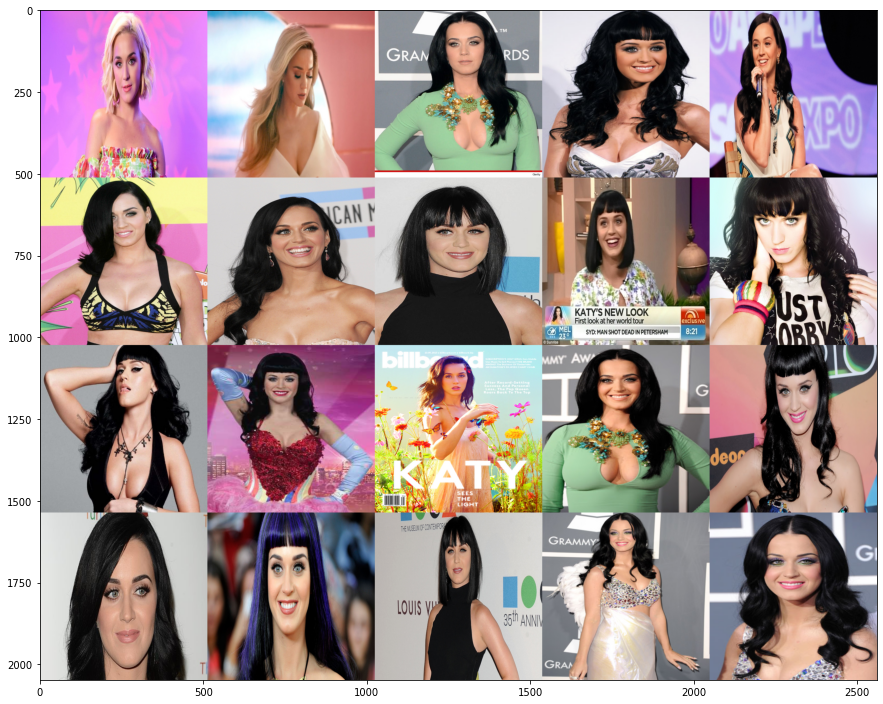

In [ ]:
i=1
image_list = ['A_'+str(i+1)+'.jpg' for i in range(20)]

images = []
print(images)
for i in range(20):
    image = cv2.imread('/content/CV_ASS/Dataset_original/PERS_A/'+image_list[i])
    #print (i)
    #cv2.imshow("im",image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #By default imread reads the images in BGR space, so convert it into RGB
    image = cv2.resize(image,(512,512)) #Resize the images in order to plot it well. This will cause some images to be stretched
    images.append(image)

h1 = np.hstack((images[0],images[1],images[2],images[3],images[4]))
h2 = np.hstack((images[5],images[6],images[7],images[8],images[9]))
h3 = np.hstack((images[10],images[11],images[12],images[13],images[14]))
h4 = np.hstack((images[15],images[16],images[17],images[18],images[19]))
#h5 = np.hstack((images[20],images[21],images[22],images[23],images[24]))
#h6 = np.hstack((images[25],images[26],images[27],images[28],images[29]))
all_images = np.vstack((h1,h2,h3,h4))
plt.figure(figsize=(15,20))
plt.imshow(all_images)

## 3.1 Preprocessing: Extracting the face using harrcascate_frontalCatface.xml and grayscale

In [ ]:
Path = '/content/CV_ASS1/'

In [ ]:
haar_cascade_face = cv2.CascadeClassifier('/content/CV_ASS/Haarcascades/haarcascade_frontalface_default.xml')

In [ ]:
#preprocess images

# directories to work (add full path)
directory_to_process = 'Selena_fringe/'
directory_processed = 'Selena_fringe_processed/' 
try:
  for paths,dirs,files in os.walk(directory_to_process):
      for filesname in files:
          test_image = cv2.imread(directory_to_process+filesname)

  # Converting to grayscale as opencv expects detector takes in input gray scale images
          test_image_gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
          faces_rects = haar_cascade_face.detectMultiScale(test_image_gray, scaleFactor = 1.2, minNeighbors = 5);

          for (x,y,w,h) in faces_rects:
              crop_face = test_image_gray[y:y+h, x:x+w]
              crop_face = cv2.resize(crop_face, (150, 150))
              cv2.imwrite(directory_processed+filesname,crop_face)
except:
  pass

## 3.2 Present preprocessed dataset

Here the preprocessed dataset can be seen with labels. Haarcascade was used to filter out the faces and images were also grayscaled.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


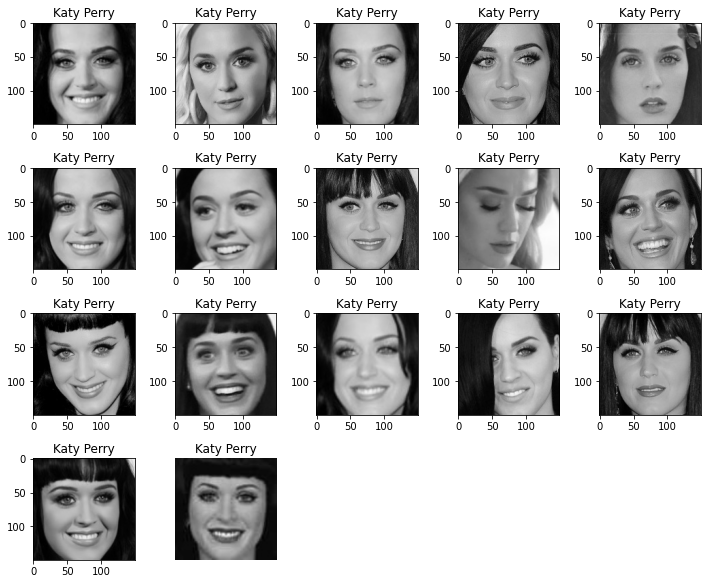

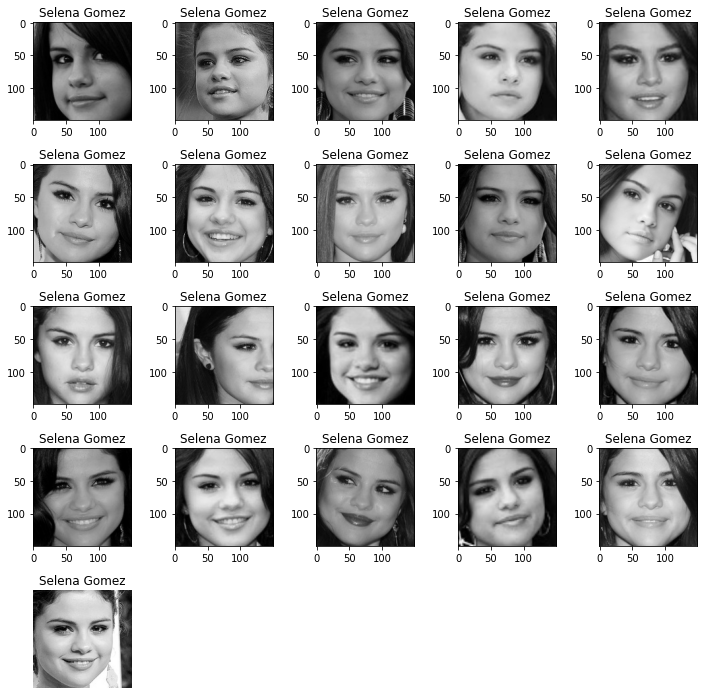

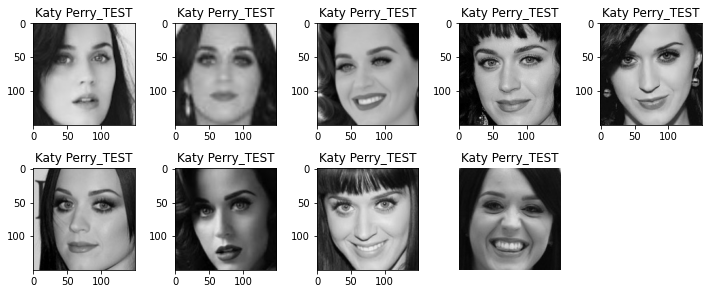

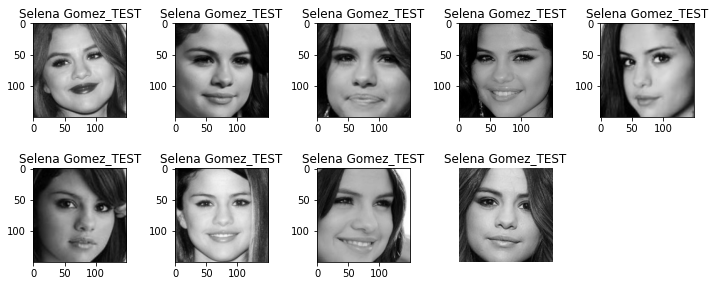

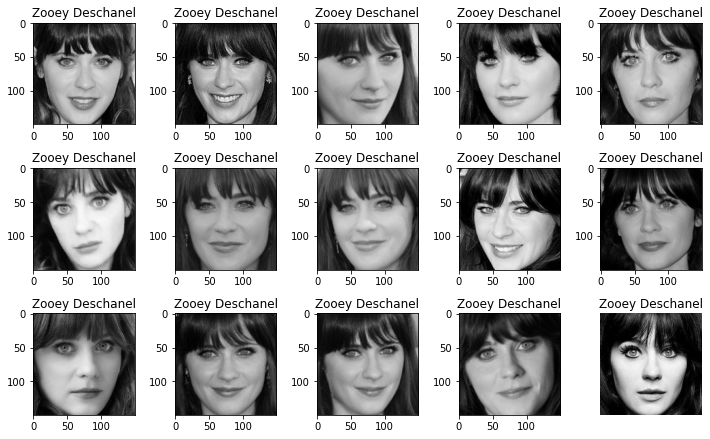

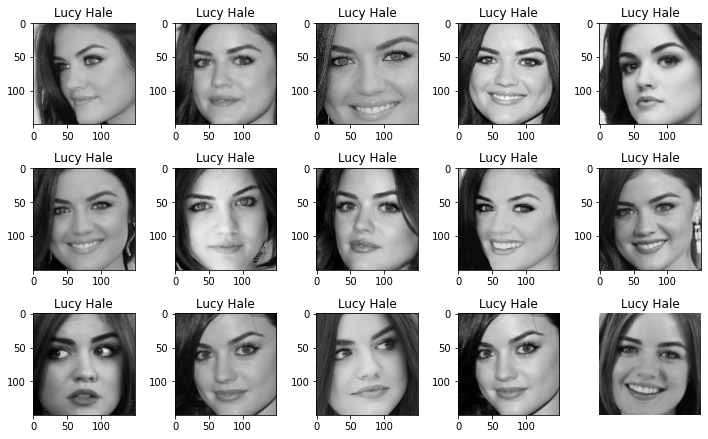

In [ ]:
path = '/content/CV_ASS/Dataset_processed/'
dir_dataset = [["PROC_A/", "Katy Perry"],
               ["PROC_B/", "Selena Gomez"],
               ["PROC_A_TEST/", "Katy Perry_TEST"],
               ["PROC_B_TEST/", "Selena Gomez_TEST"],
               ["PROC_C/", "Zooey Deschanel"],
               ["PROC_D/", "Lucy Hale"]]

rows = 5
columns = 5

try:
  for ds_dir in dir_dataset:
      fig = plt.figure(figsize=(10, 10))
      for paths_test,dirs_test,files_test in os.walk(path + ds_dir[0]):
          for idx, filesname in enumerate(files_test): 
            fig.add_subplot(rows, columns, idx+1)
            ds_img = cv2.imread(path + ds_dir[0] + filesname)  
            plt.imshow(ds_img, cmap='gray', vmin=0, vmax=255) 
            plt.subplot(rows,columns,idx+1).set_title(ds_dir[1])
            
      plt.tight_layout()
      plt.axis('off')
      plt.show()   

except ValueError:
    pass

As we expected, these two coordinates seem to differentiate the fringe in the hair (tend to be grouped in high values for both coordinates). Also, the x coordinate seems to control some head orientation (big values for faces oriented to our left and small values for faces orienting to our right). These characteristics are not intrinsic of the person, so more components may be needed (or a bigger dataset) in order for PCA to work properly.

Further, in 5.1, we will be using PCA to perform classification.

## * Transfer Learning**

Transfer learning (TL) is a research problem in machine learning (ML) that focuses on storing knowledge gained while solving one problem and applying it to a different but related problem. More Information about Transfer learning can be found on this link https://towardsdatascience.com/a-comprehensive-hands-on-guide-to-transfer-learning-with-real-world-applications-in-deep-learning-212bf3b2f27a 




In this section our  goal is not to train a neural network from scratch but rather, to leverage the face-features from
a pre-trained Convolutional Neural Network.

In [ ]:
#imports exclusive to transfer learning
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import ZeroPadding2D,Convolution2D,MaxPooling2D
from tensorflow.keras.layers import Dense,Dropout,Softmax,Flatten,Activation,BatchNormalization
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import tensorflow.keras.backend as K
import glob
import os
import dlib

! gdown https://drive.google.com/uc?id=1CPSeum3HpopfomUEK1gybeuIVoeJT_Eo


path ='/content/CV_ASS/'
model_path ="./vgg_face_weights.h5"

Downloading...
From: https://drive.google.com/uc?id=1CPSeum3HpopfomUEK1gybeuIVoeJT_Eo
To: /content/vgg_face_weights.h5
580MB [00:06, 85.5MB/s]


In [ ]:
#Define VGG_FACE_MODEL architecture
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))

Here Load the pretrained base model over which the training will be performed

In [ ]:
#Load the PreTrained VGG face model

try:
  model.load_weights(model_path)
except:
  pass

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     7

In [ ]:
vgg_face=Model(inputs=model.layers[0].input,outputs=model.layers[-2].output)

Training Data

In [ ]:
#Prepare Training Data
x_train=[]
y_train=[]
person_folders=os.listdir('/content/CV_ASS/Train/')
person_rep=dict()
for i,person in enumerate(person_folders):
  person_rep[i]=person
  print(person)
  image_names=os.listdir('/content/CV_ASS/Train/'+person+'/')
  for image_name in image_names:
    img=load_img('/content/CV_ASS/Train/'+person+'/'+image_name,target_size=(224,224))
    
    img=img_to_array(img)
    
    img=np.expand_dims(img,axis=0)
    img=preprocess_input(img)
   
    img_encode=vgg_face(img)
    
    x_train.append(np.squeeze(K.eval(img_encode)).tolist())
    y_train.append(i)

A
B


In [ ]:
person_rep = {0: 'A', 1: 'B'}

In [ ]:

x_train=np.array(x_train)
y_train=np.array(y_train)

Testing Data

In [ ]:
#Prepare Test Data
x_test=[]
y_test=[]
person_folders=os.listdir('/content/CV_ASS/Testing/Test')
for i,person in enumerate(person_folders):
  image_names=os.listdir('/content/CV_ASS/Testing/Test/'+person+'/')
  for image_name in image_names:
    img=load_img(path+'/Testing/Test/'+person+'/'+image_name,target_size=(224,224))
    #print (image_name)
    img=img_to_array(img)
    img=np.expand_dims(img,axis=0)
    img=preprocess_input(img)
    img_encode=vgg_face(img)
    x_test.append(np.squeeze(K.eval(img_encode)).tolist())
    y_test.append(i)

In [ ]:

x_test=np.array(x_test)
y_test=np.array(y_test)

In [ ]:

# Save test and train data for later use
np.save('train_data',x_train)
np.save('train_labels',y_train)
np.save('test_data',x_test)
np.save('test_labels',y_test)

In [ ]:
# Load saved data
x_train=np.load('train_data.npy')
y_train=np.load('train_labels.npy')
x_test=np.load('test_data.npy')
y_test=np.load('test_labels.npy')

In [ ]:
# Softmax regressor to classify images based on encoding 
classifier_model=Sequential()
classifier_model.add(Dense(units=100,input_dim=x_train.shape[1],kernel_initializer='glorot_uniform'))
classifier_model.add(BatchNormalization())
classifier_model.add(Activation('tanh'))
classifier_model.add(Dropout(0.3))
classifier_model.add(Dense(units=10,kernel_initializer='glorot_uniform'))
classifier_model.add(BatchNormalization())
classifier_model.add(Activation('tanh'))
classifier_model.add(Dropout(0.2))
classifier_model.add(Dense(units=2,kernel_initializer='he_uniform'))
classifier_model.add(Activation('softmax'))
classifier_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer='nadam',metrics=['accuracy'])

In [ ]:
#Train your Model
classifier_model.fit(x_train,y_train,epochs=600,validation_data=(x_train,y_train))

Epoch 1/600
2/2 [==============================] - 0s 104ms/step - loss: 0.8524 - accuracy: 0.3514 - val_loss: 0.1324 - val_accuracy: 1.0000
Epoch 2/600
2/2 [==============================] - 0s 20ms/step - loss: 0.2468 - accuracy: 0.9730 - val_loss: 0.0828 - val_accuracy: 1.0000
Epoch 3/600
2/2 [==============================] - 0s 18ms/step - loss: 0.1037 - accuracy: 1.0000 - val_loss: 0.0626 - val_accuracy: 1.0000
Epoch 4/600
2/2 [==============================] - 0s 19ms/step - loss: 0.1721 - accuracy: 0.9730 - val_loss: 0.0493 - val_accuracy: 1.0000
Epoch 5/600
2/2 [==============================] - 0s 18ms/step - loss: 0.1023 - accuracy: 1.0000 - val_loss: 0.0321 - val_accuracy: 1.0000
Epoch 6/600
2/2 [==============================] - 0s 21ms/step - loss: 0.0745 - accuracy: 1.0000 - val_loss: 0.0274 - val_accuracy: 1.0000
Epoch 7/600
2/2 [==============================] - 0s 18ms/step - loss: 0.0509 - accuracy: 1.0000 - val_loss: 0.0249 - val_accuracy: 1.0000
Epoch 8/600
2/2 [==

We obseve that the model has coverged and loss has reduced significantly

In [ ]:
!mkdir Saved_model

In [ ]:
#Save and Load the model
tf.keras.models.save_model(classifier_model,'/content/Saved_model/face_classifier_model.h5')
classifier_model=tf.keras.models.load_model('/content/Saved_model/face_classifier_model.h5')

In [ ]:
test_images_path=path+'/People/'

In [ ]:
! wget http://dlib.net/files/mmod_human_face_detector.dat.bz2
!bzip2 -dk mmod_human_face_detector.dat.bz2

--2020-04-12 18:06:51--  http://dlib.net/files/mmod_human_face_detector.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 694709 (678K)
Saving to: ‘mmod_human_face_detector.dat.bz2’

mmod_human_face_det 100%[===================>] 678.43K  1.04MB/s    in 0.6s    

2020-04-12 18:06:52 (1.04 MB/s) - ‘mmod_human_face_detector.dat.bz2’ saved [694709/694709]



In [ ]:
def plot(img):
  plt.figure(figsize=(8,4))
  plt.imshow(img[:,:,::-1])
  plt.show()

In [ ]:
person_rep={0:'Katy Perry',1:' Selena Gomez'}

In [ ]:
dnnFaceDetector=dlib.cnn_face_detection_model_v1("mmod_human_face_detector.dat")

lets try to predict a face on original image.
We use dlib face detector to identify a face and over it we perform the prediction using our trained model

In [ ]:
try:
  for paths,dirs,files in os.walk("/content/CV_ASS/People/For_test/"):
      for filesname in files:
          
    
        img=cv2.imread('/content/CV_ASS/People/For_test/'+filesname)
        gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # Detect Faces
        rects=dnnFaceDetector(gray,1)
        left,top,right,bottom=0,0,0,0
        for (i,rect) in enumerate(rects):
          # Extract Each Face
          left=rect.rect.left() #x1
          top=rect.rect.top() #y1
          right=rect.rect.right() #x2
          bottom=rect.rect.bottom() #y2
          width=right-left
          height=bottom-top
          img_crop=img[top:top+height,left:left+width]
          cv2.imwrite('/content/CV_ASS/People/Pred/test.jpg',img_crop)
          
          # Get Embeddings
          crop_img=load_img('/content/CV_ASS/People/Pred/test.jpg',target_size=(224,224))
          crop_img=img_to_array(crop_img)
          crop_img=np.expand_dims(crop_img,axis=0)
          crop_img=preprocess_input(crop_img)
          img_encode=vgg_face(crop_img)

          # Make Predictions
          embed=K.eval(img_encode)
          person=classifier_model.predict(embed)
          name=person_rep[np.argmax(person)]
          os.remove('/content/CV_ASS/People/Pred/test.jpg')
          cv2.rectangle(img,(left,top),(right,bottom),(0,255,0), 2)
          img=cv2.putText(img,name,(left,top-10),cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,255),2,cv2.LINE_AA)
          img=cv2.putText(img,str(np.max(person)),(right,bottom+10),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),1,cv2.LINE_AA)
          plt.imshow(img)
        # Save images with bounding box,name and accuracy 
        cv2.imwrite(path+'/Predictions/'+filesname,img)
except:
  pass

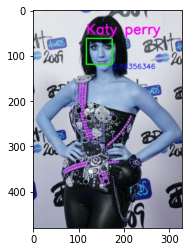

In [ ]:
img=cv2.imread(path+'/Predictions/A_16.jpg')
plt.imshow(img)


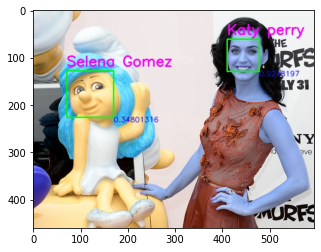

In [ ]:
img=cv2.imread(path+'/Predictions/A_15.jpg')
plt.imshow(img)

Its pretty funny that other face gets detected as Selena gomez but since its a classifier with 2 class all detected faces with get lable from the defined class

We can do probablity thresholding. but this only reduces the problem doesnot remove it

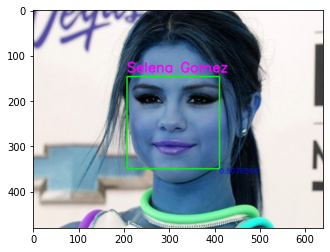

In [ ]:
img=cv2.imread(path+'/Predictions/B_1.jpg')
plt.imshow(img)





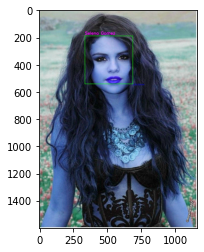

In [ ]:
img1=cv2.imread(path+'/Predictions/B_5.jpg')
plt.imshow(img1)

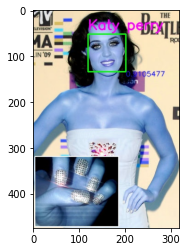

In [ ]:
img1=cv2.imread(path+'/Predictions/A_10.jpg')
plt.imshow(img1)

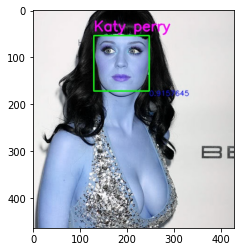

In [ ]:
img1=cv2.imread(path+'/Predictions/A_2.jpg')
plt.imshow(img1)

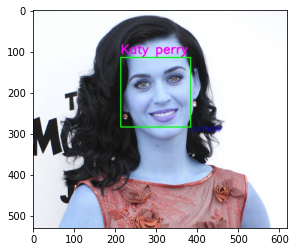

In [ ]:
img1=cv2.imread(path+'/Predictions/A_1.jpg')
plt.imshow(img1)

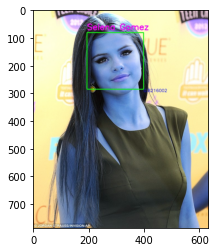

In [ ]:
img1=cv2.imread(path+'/Predictions/B_2.jpg')
plt.imshow(img1)

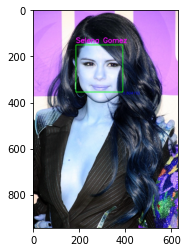

In [ ]:
img1=cv2.imread(path+'/Predictions/B_3.jpg')
plt.imshow(img1)

### **Feature Map**


Layer by Layer feature visualization

In [ ]:
image=cv2.imread("/content/CV_ASS/Dataset_processed/PROC_A/A_10.jpg")


In [ ]:
for idx, layer in enumerate(vgg_face.layers):
  if 'conv' not in layer.name:
    continue
  print(idx, layer.name, layer.output.shape)


2 conv2d (None, 224, 224, 64)
4 conv2d_1 (None, 224, 224, 64)
7 conv2d_2 (None, 112, 112, 128)
9 conv2d_3 (None, 112, 112, 128)
12 conv2d_4 (None, 56, 56, 256)
14 conv2d_5 (None, 56, 56, 256)
16 conv2d_6 (None, 56, 56, 256)
19 conv2d_7 (None, 28, 28, 512)
21 conv2d_8 (None, 28, 28, 512)
23 conv2d_9 (None, 28, 28, 512)
26 conv2d_10 (None, 14, 14, 512)
28 conv2d_11 (None, 14, 14, 512)
30 conv2d_12 (None, 14, 14, 512)
32 conv2d_13 (None, 1, 1, 4096)
34 conv2d_14 (None, 1, 1, 4096)
36 conv2d_15 (None, 1, 1, 2622)


In [ ]:

img1 = cv2.resize(image,(224,224))
img1 = img1.reshape(1,224,224,3)



Lets try to get feature map of a image from class A from Layer 4

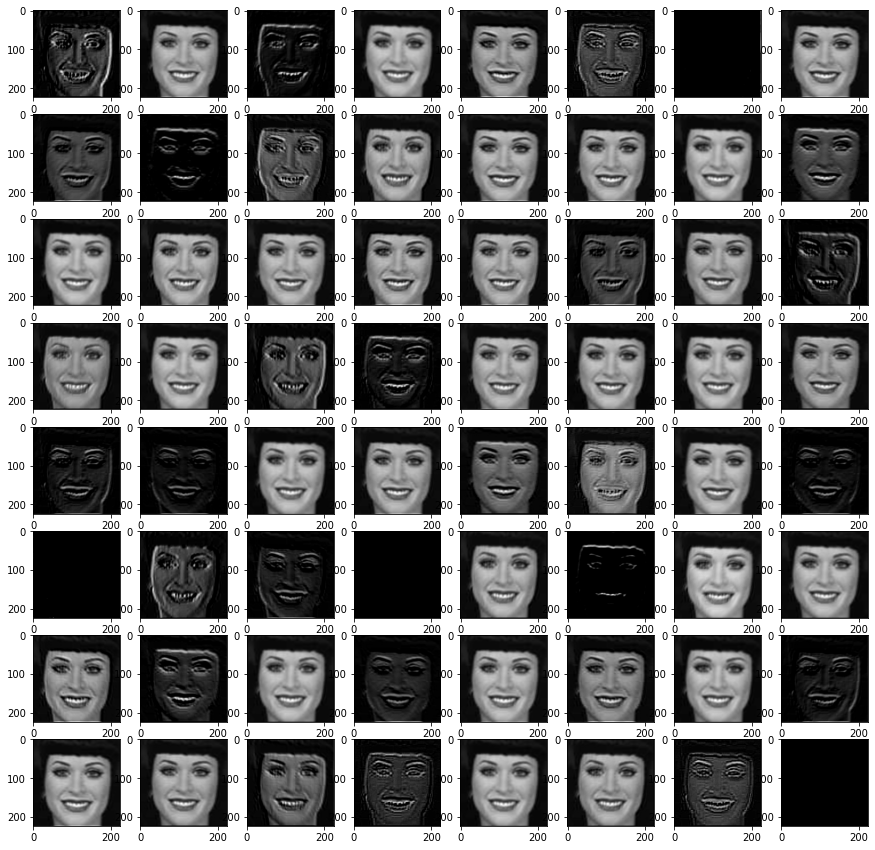

In [ ]:
newModel = Model(inputs=vgg_face.inputs, outputs=vgg_face.layers[4].output)
newMap = newModel.predict(img1)
f = plt.figure(figsize=(15,15))
count = 1
for i in range(8):
  for j in range(8):
    ax = plt.subplot(8,8,count)
    plt.imshow(newMap[0,:,:,count-1],cmap='gray')
    count += 1

Lets try to get feature map of a image from class B from Layer 10

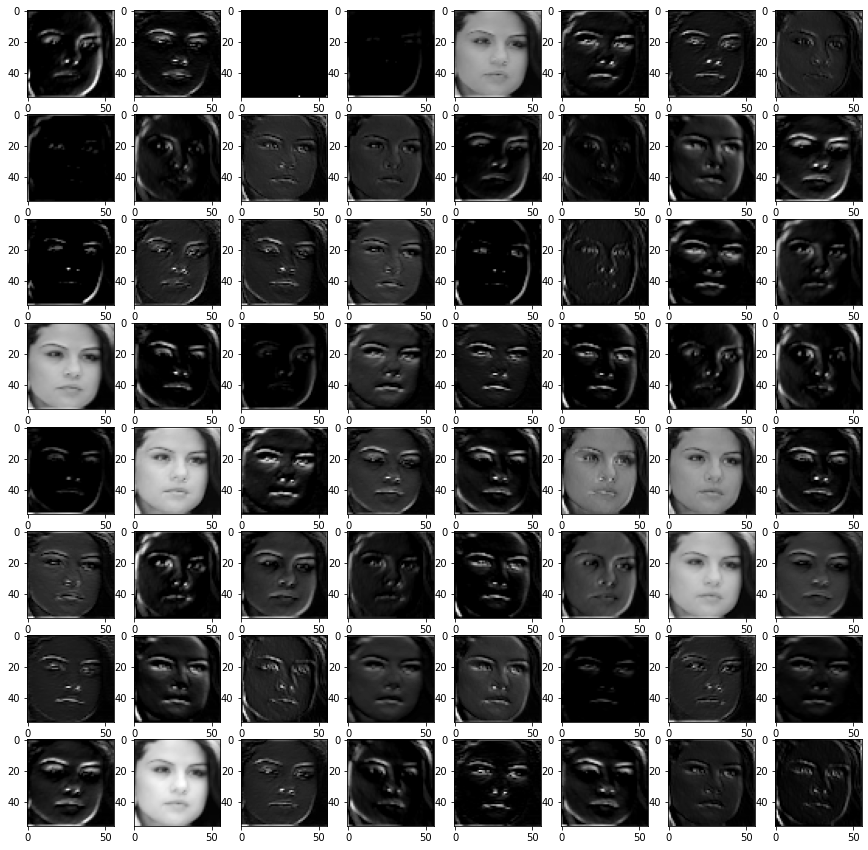

In [ ]:
image2=cv2.imread("/content/CV_ASS/Dataset_processed/PROC_B/B_11.jpg")
img2 = cv2.resize(image2,(224,224))
img2 = img2.reshape(1,224,224,3)
newModel = Model(inputs=vgg_face.inputs, outputs=vgg_face.layers[10].output)
newMap = newModel.predict(img2)
f = plt.figure(figsize=(15,15))
count = 1
for i in range(8):
  for j in range(8):
    ax = plt.subplot(8,8,count)
    plt.imshow(newMap[0,:,:,count-1],cmap='gray')
    count += 1

### Checking the probablity scores for Person A person B Person C Person D

In [ ]:
people = []
for paths,dirs,files in os.walk('/content/CV_ASS/Dataset_processed/PROC_A/'):
      for filesname in files:
          #test_image = cv2.imread("/content/CV_ASS/Dataset_processed/PROC_B"+filesname)
          crop_img=load_img('/content/CV_ASS/Dataset_processed/PROC_A/'+filesname,target_size=(224,224))
          crop_img=img_to_array(crop_img)
          crop_img=np.expand_dims(crop_img,axis=0)
          crop_img=preprocess_input(crop_img)
          img_encode=vgg_face(crop_img)
          embed=K.eval(img_encode)


          # Make Predictions

          person=classifier_model.predict(embed)
          print(filesname)
          print(person)
          name=person_rep[np.argmax(person)]

A_12.jpg
[[9.9908805e-01 9.1197918e-04]]
A_1.jpg
[[0.9988894 0.0011106]]
A_3.jpg
[[9.9936765e-01 6.3240441e-04]]
A_17.jpg
[[9.9910873e-01 8.9122821e-04]]
A_11.jpg
[[0.9986009  0.00139911]]
A_16.jpg
[[9.992781e-01 7.218933e-04]]
A_5.jpg
[[0.9986117  0.00138827]]
A_8.jpg
[[0.9957515  0.00424845]]
A_2.jpg
[[0.9753269  0.02467315]]
A_7.jpg
[[0.99849546 0.00150451]]
A_18.jpg
[[0.9976732  0.00232682]]
A_19.jpg
[[9.9901855e-01 9.8147069e-04]]
A_15.jpg
[[9.9917656e-01 8.2343788e-04]]
A_6.jpg
[[0.99897194 0.00102805]]
A_14.jpg
[[0.9974112  0.00258879]]
A_4.jpg
[[0.99787426 0.0021258 ]]
A_10.jpg
[[0.9941803  0.00581976]]


In [ ]:
for paths,dirs,files in os.walk('/content/CV_ASS/Dataset_processed/PROC_B/'):
      for filesname in files:
          #test_image = cv2.imread("/content/CV_ASS/Dataset_processed/PROC_B"+filesname)
          crop_img=load_img('/content/CV_ASS/Dataset_processed/PROC_B/'+filesname,target_size=(224,224))
          crop_img=img_to_array(crop_img)
          crop_img=np.expand_dims(crop_img,axis=0)
          crop_img=preprocess_input(crop_img)
          img_encode=vgg_face(crop_img)
          embed=K.eval(img_encode)


          # Make Predictions

          person=classifier_model.predict(embed)
          print(filesname)
          print(person)
          name=person_rep[np.argmax(person)]

B_23.jpg
[[0.00366494 0.996335  ]]
B_7.jpg
[[0.00149587 0.99850416]]
B_21.jpg
[[0.00228658 0.99771345]]
B_11.jpg
[[0.0016133  0.99838674]]
B_17.jpg
[[0.00351287 0.99648714]]
B_14.jpg
[[0.0013092 0.9986908]]
B_8.jpg
[[0.00244459 0.99755543]]
B_15.jpg
[[0.00277676 0.99722326]]
B_TEST_1.jpg
[[0.00118065 0.9988193 ]]
B_16.jpg
[[0.00176618 0.9982338 ]]
B_18.jpg
[[0.00207448 0.9979255 ]]
B_25.jpg
[[0.00720567 0.99279433]]
B_13.jpg
[[0.0012865 0.9987135]]
B_20.jpg
[[0.0016258 0.9983742]]
B_TEST_4.jpg
[[0.00294729 0.99705267]]
B_10.jpg
[[0.00163251 0.9983675 ]]
B_TEST_3.jpg
[[0.00156443 0.99843556]]
B_TEST_5.jpg
[[0.00261072 0.99738926]]
B_19.jpg
[[0.00152623 0.9984737 ]]
B_24.jpg
[[0.00313034 0.9968696 ]]
B_6.jpg
[[0.00294563 0.99705434]]


In [ ]:
for paths,dirs,files in os.walk('/content/CV_ASS/Dataset_processed/PROC_C/'):
      for filesname in files:
          #test_image = cv2.imread("/content/CV_ASS/Dataset_processed/PROC_B"+filesname)
          crop_img=load_img('/content/CV_ASS/Dataset_processed/PROC_C/'+filesname,target_size=(224,224))
          crop_img=img_to_array(crop_img)
          crop_img=np.expand_dims(crop_img,axis=0)
          crop_img=preprocess_input(crop_img)
          img_encode=vgg_face(crop_img)
          embed=K.eval(img_encode)


          # Make Predictions

          person=classifier_model.predict(embed)
          print(filesname)
          print(person)
          name=person_rep[np.argmax(person)]
          print(name)

C_4.jpg
[[0.9461017  0.05389825]]
Katy Perry
C_9.jpg
[[0.9375476  0.06245235]]
Katy Perry
C_0.jpg
[[0.9266389  0.07336115]]
Katy Perry
C_13.jpg
[[0.79602    0.20398001]]
Katy Perry
C_14.jpg
[[0.96028894 0.03971107]]
Katy Perry
C_3.jpg
[[0.63169384 0.36830616]]
Katy Perry
C_6.jpg
[[0.97026616 0.02973386]]
Katy Perry
C_7.jpg
[[0.891501   0.10849899]]
Katy Perry
C_15.jpg
[[0.97572213 0.02427789]]
Katy Perry
C_12.jpg
[[0.98213744 0.01786252]]
Katy Perry
C_8.jpg
[[0.9550575  0.04494251]]
Katy Perry
C_1.jpg
[[0.9327162  0.06728381]]
Katy Perry
C_5.jpg
[[0.93482155 0.06517851]]
Katy Perry
C_11.jpg
[[0.9562025  0.04379744]]
Katy Perry
C_10.jpg
[[0.91759    0.08240998]]
Katy Perry


In [ ]:
for paths,dirs,files in os.walk('/content/CV_ASS/Dataset_processed/PROC_D/'):
      for filesname in files:
          #test_image = cv2.imread("/content/CV_ASS/Dataset_processed/PROC_B"+filesname)
          crop_img=load_img('/content/CV_ASS/Dataset_processed/PROC_D/'+filesname,target_size=(224,224))
          crop_img=img_to_array(crop_img)
          crop_img=np.expand_dims(crop_img,axis=0)
          crop_img=preprocess_input(crop_img)
          img_encode=vgg_face(crop_img)
          embed=K.eval(img_encode)


          # Make Predictions

          person=classifier_model.predict(embed)
          print(filesname)
          print(person)
          name=person_rep[np.argmax(person)]
          print(name)

D_8.jpg
[[0.07653228 0.9234677 ]]
 Selena Gomez
D_3.jpg
[[0.8110782  0.18892178]]
Katy Perry
D_11.jpg
[[0.19012122 0.8098788 ]]
 Selena Gomez
D_15.jpg
[[0.39339367 0.60660636]]
 Selena Gomez
D_4.jpg
[[0.38750038 0.61249965]]
 Selena Gomez
D_13.jpg
[[0.44804612 0.5519539 ]]
 Selena Gomez
D_1.jpg
[[0.18169948 0.8183005 ]]
 Selena Gomez
D_14.jpg
[[0.66432464 0.3356754 ]]
Katy Perry
D_10.jpg
[[0.6711324 0.3288676]]
Katy Perry
D_6.jpg
[[0.1105402  0.88945985]]
 Selena Gomez
D_12.jpg
[[0.8668059  0.13319412]]
Katy Perry
D_5.jpg
[[0.22885588 0.7711441 ]]
 Selena Gomez
D_9.jpg
[[0.02186481 0.9781352 ]]
 Selena Gomez
D_2.jpg
[[0.15824959 0.84175044]]
 Selena Gomez
D_7.jpg
[[0.11087181 0.8891282 ]]
 Selena Gomez


![alt text](https://)

### **Feature Visualiztion usind tSNE**



**Dimensionality Reduction**
If you have worked with a dataset before with a lot of features, you can fathom how difficult it is to understand or explore the relationships between the features. Not only it makes the EDA process difficult but also affects the machine learning model’s performance since the chances are that you might overfit your model or violate some of the assumptions of the algorithm, like the independence of features in linear regression. This is where dimensionality reduction comes in. In machine learning, dimensionality reduction is the process of reducing the number of random variables under consideration by obtaining a set of principal variables. By reducing the dimension of your feature space, you have fewer relationships between features to consider which can be explored and visualized easily and also you are less likely to overfit your model.

Dimensionality reduction can be achieved in the following ways:

**Feature Elimination**: You reduce the feature space by eliminating features. This has a disadvantage though, as you gain no information from those features that you have dropped.

**Feature Selection**: You apply some statistical tests in order to rank them according to their importance and then select a subset of features for your work. This again suffers from information loss and is less stable as different test gives different importance score to features. You can check more on this here.

**Feature Extraction** : You create new independent features, where each new independent feature is a combination of each of the old independent features. These techniques can further be divided into linear and non-linear dimensionality reduction techniques.


**t-Distributed Stochastic Neighbor Embedding (t-SNE)**

t-Distributed Stochastic Neighbor Embedding (t-SNE) is a non-linear technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets. It is extensively applied in image processing, NLP, genomic data and speech processing. To keep things simple, here’s a brief overview of working of t-SNE:

The algorithms starts by calculating the probability of similarity of points in high-dimensional space and calculating the probability of similarity of points in the corresponding low-dimensional space. The similarity of points is calculated as the conditional probability that a point A would choose point B as its neighbor if neighbors were picked in proportion to their probability density under a Gaussian (normal distribution) centered at A.
It then tries to minimize the difference between these conditional probabilities (or similarities) in higher-dimensional and lower-dimensional space for a perfect representation of data points in lower-dimensional space.
To measure the minimization of the sum of difference of conditional probability t-SNE minimizes the sum of Kullback-Leibler divergence of overall data points using a gradient descent method.

In [ ]:

x_train_features=[]
y_train_features=[]
person_folders=os.listdir('/content/CV_ASS/Train/')
person_rep=dict()
for i,person in enumerate(person_folders):
  person_rep[i]=person
  print(person)
  image_names=os.listdir('/content/CV_ASS/Train/'+person+'/')
  for image_name in image_names:
    img=load_img('/content/CV_ASS/Train/'+person+'/'+image_name,target_size=(224,224))
    
    img=img_to_array(img)
    img = cv2.resize(img,(224,224))
    img = img.reshape(1,224,224,3)

    
    img=np.expand_dims(img,axis=0)
    img=preprocess_input(img)
    newModel = Model(inputs=vgg_face.inputs, outputs=vgg_face.layers[4].output)
    newMap = newModel.predict(img1)  
    #img_encode=vgg_face(img)
    
    
    x_train_features.append(np.squeeze(K.eval(newMap)).tolist())
    y_train_features.append(i)





A
B


In [ ]:
x_train_features=np.array(x_train)
y_train_features=np.array(y_train)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


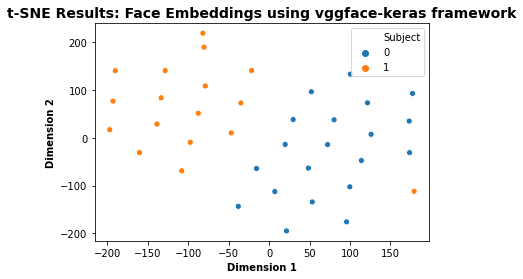

In [ ]:
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.manifold import TSNE
x = list(x_train_features)

y = list(y_train_features)
df = pd.DataFrame({'Embeddings': x, 'Subject': y})



X_embedded = TSNE(n_components=2).fit_transform(x)


df['Subject'] = df['Subject'].astype('category')
sns.scatterplot(X_embedded[:,0], X_embedded[:,1],legend='full', hue=df['Subject'])
plt.title('t-SNE Results: Face Embeddings using vggface-keras framework', weight='bold').set_fontsize('14')
plt.xlabel('Dimension 1', weight='bold').set_fontsize('10')
plt.ylabel('Dimension 2', weight='bold').set_fontsize('10')
plt.show()


# 5.1 Classification


## **5.1.1 Histogram of Oriented Gradients (HOG features) - Exploit features representation**

### **HOG features and SVM**

After training and tests HOG features from the images with Katy Perry and Selena Gómez were obtained, a **Support Vector Machine (SVM)** was used for classification and identification purposes. Each of the vectors with HOG features has a label with the person associated to it, allowing to train the SVM this way. SVM is usually combined with HOG features extraction, as previous literature shows that these two tecniques perform well together. More information about SVM can be found in https://scikit-learn.org/stable/modules/svm.html. 

A linear kernel was used to train the SVM. After training, test HOG features were used to evaluate how the algorithm is performing. The results are shown after executing the next block of code. An accuracy, precision and recall of 100 % were obtained, showing that combining SVM with HOG features vectors returns excellent results.

In [ ]:


clf = svm.SVC(kernel='linear', C = 1.0)
clf.fit(hogFeatures, hogLabels)

labelsPredictedHOG = clf.predict(hogFeaturesTest)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(hogLabelsExpected, labelsPredictedHOG))
# Model Precision: TP/TP+FP
print("Precision:",metrics.precision_score(hogLabelsExpected, labelsPredictedHOG, pos_label="Katy Perry"))

# Model Recall: TP/TP+FN
print("Recall:",metrics.recall_score(hogLabelsExpected, labelsPredictedHOG, pos_label="Katy Perry"))

print(classification_report(hogLabelsExpected, labelsPredictedHOG))

for idx in range(len(labelsPredictedHOG)):
    print("\nPredicted: ", labelsPredictedHOG[idx], ". Expected: ", hogLabelsExpected[idx])



Accuracy: 1.0
Precision: 1.0
Recall: 1.0
              precision    recall  f1-score   support

  Katy Perry       1.00      1.00      1.00         5
Selena Gomez       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10


Predicted:  Katy Perry . Expected:  Katy Perry

Predicted:  Katy Perry . Expected:  Katy Perry

Predicted:  Katy Perry . Expected:  Katy Perry

Predicted:  Katy Perry . Expected:  Katy Perry

Predicted:  Katy Perry . Expected:  Katy Perry

Predicted:  Selena Gomez . Expected:  Selena Gomez

Predicted:  Selena Gomez . Expected:  Selena Gomez

Predicted:  Selena Gomez . Expected:  Selena Gomez

Predicted:  Selena Gomez . Expected:  Selena Gomez

Predicted:  Selena Gomez . Expected:  Selena Gomez


Some images of person C and person D were obtained. How similar persons are is sth that sometimes may be subjective and it may depends on the person who is guessing it. However, our choice for person C is a person that many people would consider similar to Katy Perry. Person D was supposed to be similar to Selena Gómez (however, in this case, some people also find similarities to Katy Perry).

HOG fetures from images of person C and person D are obtained, and later, these features are used to make predictions. Will person C be predicted as Katy Perry as we may expect? How will person D be predicted?

In [ ]:
#Now we obtain HOGs of lookalikes, person C and person D

filenamesC = glob.glob("CV_ASS/Dataset_processed/PROC_C/*.jpg")
#filenamesC.sort()
imagesC = [cv2.imread(img) for img in filenamesC]

hogFeaturesTest2 = []
hogLabelsExpected2 = []


ia=0
for img in imagesC:

    # turn image to B&W
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    [h,w] = img.shape

    #bilateral filter for blurring while preserving edges
    imgbil = cv2.bilateralFilter(img,3,30,30)

    #canny filter for edge detection
    high_thresh, thresh_im = cv2.threshold(imgbil, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    lowThresh = 0.5*high_thresh
            
    imgedges = cv2.Canny(imgbil,lowThresh,high_thresh)

    #HOG of the images are obtained
    (H, hogImage) = feature.hog(imgedges, orientations=9, pixels_per_cell=(4, 4),
	  cells_per_block=(2, 2), transform_sqrt=True, block_norm="L1",
	  visualize=True)
    hogFeaturesTest2.append(H)
    hogLabelsExpected2.append("Person C")

    ia = ia + 1

#######################################

#Same proccedure repeated for person D

#######################################

filenamesD = glob.glob("CV_ASS/Dataset_processed/PROC_D/*.jpg")
#filenamesD.sort()
imagesD = [cv2.imread(img) for img in filenamesD]


ib=0
for img in imagesD:

    # turn image to B&W
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    [h,w] = img.shape

    #bilateral filter for blurring while preserving edges
    imgbil = cv2.bilateralFilter(img,3,30,30)

    #canny filter for edge detection
    high_thresh, thresh_im = cv2.threshold(imgbil, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    lowThresh = 0.5*high_thresh
            
    imgedges = cv2.Canny(imgbil,lowThresh,high_thresh)

    #HOG of the images are obtained
    (H, hogImage) = feature.hog(imgedges, orientations=9, pixels_per_cell=(4, 4),
	  cells_per_block=(2, 2), transform_sqrt=True, block_norm="L1",
	  visualize=True)
    hogFeaturesTest2.append(H)
    hogLabelsExpected2.append("Person D")

    ib = ib + 1

The results from the predictions are shown after running the following code:

In [ ]:
#Now, we look at the predictions for the lookalikes


labelsPredictedHOG2 = clf.predict(hogFeaturesTest2)

personcwhenkaty = 0;
persondwhenkaty = 0;
personcwhenselena = 0;
persondwhenselena = 0;

for idx in range(len(labelsPredictedHOG2)):
    print("\nPredicted: ", labelsPredictedHOG2[idx], ". Real person: ", hogLabelsExpected2[idx])
    

    if(labelsPredictedHOG2[idx]=="Katy Perry" and hogLabelsExpected2[idx]=="Person C"):
      personcwhenkaty = personcwhenkaty + 1;
    elif(labelsPredictedHOG2[idx]=="Katy Perry" and hogLabelsExpected2[idx]=="Person D"):
      persondwhenkaty = persondwhenkaty + 1;
    elif(labelsPredictedHOG2[idx]=="Selena Gomez" and hogLabelsExpected2[idx]=="Person C"):
      personcwhenselena = personcwhenselena + 1;
    elif(labelsPredictedHOG2[idx]=="Selena Gomez" and hogLabelsExpected2[idx]=="Person D"):
      persondwhenselena = persondwhenselena + 1;




Predicted:  Katy Perry . Real person:  Person C

Predicted:  Katy Perry . Real person:  Person C

Predicted:  Katy Perry . Real person:  Person C

Predicted:  Katy Perry . Real person:  Person C

Predicted:  Katy Perry . Real person:  Person C

Predicted:  Katy Perry . Real person:  Person C

Predicted:  Katy Perry . Real person:  Person C

Predicted:  Katy Perry . Real person:  Person C

Predicted:  Selena Gomez . Real person:  Person C

Predicted:  Katy Perry . Real person:  Person C

Predicted:  Selena Gomez . Real person:  Person C

Predicted:  Katy Perry . Real person:  Person C

Predicted:  Katy Perry . Real person:  Person C

Predicted:  Katy Perry . Real person:  Person C

Predicted:  Katy Perry . Real person:  Person C

Predicted:  Selena Gomez . Real person:  Person D

Predicted:  Katy Perry . Real person:  Person D

Predicted:  Selena Gomez . Real person:  Person D

Predicted:  Selena Gomez . Real person:  Person D

Predicted:  Selena Gomez . Real person:  Person D

Predict

In [ ]:
print("\nPerson C was predicted as Katy Perry: ", personcwhenkaty , "times\n")
print("Person C was predicted as Selena Gomez: ", personcwhenselena , "times\n")
print("Person D was predicted as Katy Perry: ", persondwhenkaty , "times\n")
print("Person D was predicted as Selena Gomez: ", persondwhenselena , "times\n")


Person C was predicted as Katy Perry:  13 times

Person C was predicted as Selena Gomez:  2 times

Person D was predicted as Katy Perry:  6 times

Person D was predicted as Selena Gomez:  9 times



Person C was predicted 13 times as Katy Perry while only 2 times as Selena Gómez. This agrees with the our previous expectations. However, person D was predicted as Selena 9 times, while it was predicted as Katy 6 times. In this case, we mentioned before that, even there may be a general idea that person D is similar to Selena, she may has also some features similar to Katy. Those "subjective" beliefs actually agree with the results obtained using HOG features with an SVM.

## 5.1.2 Classification with PCA


First, we will be using PCA to classify our images. In the past, it has been used in combination with random forest.  This technique consists on creating a bunch of decision trees using randomness to build them. Then, we let them vote for the classification. It exploits the idea of: 'A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models'.

So, we use PCA with different number of components (5, 20 and 37, which is the maximum since we have only 37 training images) and train a random forest.

In [ ]:
# Creating learning arrays
y1 = np.zeros(n_train_A)
y2 = np.ones(n_train_B)
y = np.append(y1, y2)

y1 = np.zeros(n_test_A)
y2 = np.ones(n_test_B)
y_test = np.append(y1, y2)

# Components used
components = [5,10,20,37]
ncomponents = len(components)

Let's try another Machine Learning method. Random forest has proven to perform well on these situations... let us see.

In [ ]:

for i in range(ncomponents):
  pca = PCA(n_components=components[i])
  pca.fit(matrix)
  matrix_pca = pca.transform(matrix)
  matrix_test_pca = pca.transform(matrix_test)
  rf = RandomForestClassifier(random_state=42)
  rf.fit(matrix_pca, y)

  # Predicting on train data
  print('\nRandom forest with %d components' % (components[i]))
  preds = rf.predict(matrix_pca)
  acc = (preds == y).sum().item() / n_train
  print('Train accuracy: %f' % (acc))
  #print('Confusion matrix:\n')
  #print(confusion_matrix(preds, y))
  # Predicting on test data
  preds = rf.predict(matrix_test_pca)
  acc = (preds == y_test).sum().item() / n_test
  print('Test accuracy: %f' % (acc))
  #print('Confusion matrix:\n')
  #print(confusion_matrix(preds, y_test))


Random forest with 5 components
Train accuracy: 1.000000
Test accuracy: 0.800000

Random forest with 10 components
Train accuracy: 1.000000
Test accuracy: 0.900000

Random forest with 20 components
Train accuracy: 1.000000
Test accuracy: 0.900000

Random forest with 37 components
Train accuracy: 1.000000
Test accuracy: 0.900000


This method performs quite better. Train data is always well classified, and test data improves as we have more features, reaching 90% accuracy with 10, 20 and 37 components. It is quite fast, since the entire code ran in less than 5s (including image preprocess, 4 random forest trainings and classifying all images 4 times). Classifying this way is not perfect but it is pretty good taking into account its simplicity. 

Now, let's try the chosen model (random forest with 37 components) on the lookalikes.

In [ ]:
y1 = np.zeros(n_C)
y2 = np.ones(n_D)
y_look = np.append(y1, y2)

matrix_look_pca = pca.transform(matrix_look)
# Predicting on lookalikes data
preds = rf.predict(matrix_look_pca)
acc = np.array(preds == y_look).sum().item() / (n_C + n_D)
print('Lookalikes accuracy: %f\nConfusion matrix:' % (acc))
print(confusion_matrix(preds, y_look))


Lookalikes accuracy: 0.600000
Confusion matrix:
[[15 12]
 [ 0  3]]


As we can see, all of C datapoints were classsified as A, but D were splitted. Once more, we have evidences that C does resemble to A, but D is somewhere in between A and B.

## 5.1.3 Classification using Transfer Learning

Lets test our classifier on test set

In [ ]:
person_rep={0:'Katy Perry',1:' Selena Gomez'}

In [ ]:
for paths,dirs,files in os.walk('/content/CV_ASS/Testing/Test/A/'):
      for filesname in files:
          #test_image = cv2.imread("/content/CV_ASS/Dataset_processed/PROC_B"+filesname)
          crop_img=load_img('/content/CV_ASS/Testing/Test/A/'+filesname,target_size=(224,224))
          crop_img=img_to_array(crop_img)
          crop_img=np.expand_dims(crop_img,axis=0)
          crop_img=preprocess_input(crop_img)
          img_encode=vgg_face(crop_img)
          embed=K.eval(img_encode)
           
          
          # Make Predictions
          if(filesname.split("_")[0]=="A"):
            per = "Katy Perry"
          else:
            per= "Selena gomez"
          person=classifier_model.predict(embed)
          #print(filesname)
          #print(person)
          name=person_rep[np.argmax(person)]
          print("\nPredicted: ", name, ". Real person: ", per)
for paths,dirs,files in os.walk('/content/CV_ASS/Testing/Test/B/'):
      for filesname in files:
          #test_image = cv2.imread("/content/CV_ASS/Dataset_processed/PROC_B"+filesname)
          crop_img=load_img('/content/CV_ASS/Testing/Test/B/'+filesname,target_size=(224,224))
          crop_img=img_to_array(crop_img)
          crop_img=np.expand_dims(crop_img,axis=0)
          crop_img=preprocess_input(crop_img)
          img_encode=vgg_face(crop_img)
          embed=K.eval(img_encode)
           
          
          # Make Predictions
          if(filesname.split("_")[0]=="A"):
            per = "Katy Perry"
          else:
            per= "Selena gomez"
          person=classifier_model.predict(embed)
          #print(filesname)
          #print(person)
          name=person_rep[np.argmax(person)]
          print("\nPredicted: ", name, ". Real person: ", per)
         


Predicted:  Katy Perry . Real person:  Katy Perry

Predicted:  Katy Perry . Real person:  Katy Perry

Predicted:  Katy Perry . Real person:  Katy Perry

Predicted:  Katy Perry . Real person:  Katy Perry

Predicted:  Katy Perry . Real person:  Katy Perry

Predicted:  Katy Perry . Real person:  Katy Perry

Predicted:  Katy Perry . Real person:  Katy Perry

Predicted:  Katy Perry . Real person:  Katy Perry

Predicted:  Katy Perry . Real person:  Katy Perry

Predicted:  Katy Perry . Real person:  Katy Perry

Predicted:  Katy Perry . Real person:  Katy Perry

Predicted:  Katy Perry . Real person:  Katy Perry

Predicted:  Katy Perry . Real person:  Katy Perry

Predicted:  Katy Perry . Real person:  Katy Perry

Predicted:  Katy Perry . Real person:  Katy Perry

Predicted:  Katy Perry . Real person:  Katy Perry

Predicted:  Katy Perry . Real person:  Katy Perry

Predicted:  Katy Perry . Real person:  Katy Perry

Predicted:  Katy Perry . Real person:  Katy Perry

Predicted:  Katy Perry . Real 

Now lets test on Look alikes

In [ ]:
for paths,dirs,files in os.walk('/content/CV_ASS/Dataset_processed/PROC_C/'):
      for filesname in files:
          #test_image = cv2.imread("/content/CV_ASS/Dataset_processed/PROC_B"+filesname)
          crop_img=load_img('/content/CV_ASS/Dataset_processed/PROC_C/'+filesname,target_size=(224,224))
          crop_img=img_to_array(crop_img)
          crop_img=np.expand_dims(crop_img,axis=0)
          crop_img=preprocess_input(crop_img)
          img_encode=vgg_face(crop_img)
          embed=K.eval(img_encode)

          if(filesname.split("_")[0]=="C"):
            per = "Zooey Deschanel"
          else:
            per= "Lucy Hale"
          # Make Predictions

          person=classifier_model.predict(embed)
          
          name=person_rep[np.argmax(person)]
          print("\nPredicted: ", name, ". Real person: ", per)
for paths,dirs,files in os.walk('/content/CV_ASS/Dataset_processed/PROC_D/'):
      for filesname in files:
          #test_image = cv2.imread("/content/CV_ASS/Dataset_processed/PROC_B"+filesname)
          crop_img=load_img('/content/CV_ASS/Dataset_processed/PROC_D/'+filesname,target_size=(224,224))
          crop_img=img_to_array(crop_img)
          crop_img=np.expand_dims(crop_img,axis=0)
          crop_img=preprocess_input(crop_img)
          img_encode=vgg_face(crop_img)
          embed=K.eval(img_encode)

          if(filesname.split("_")[0]=="A"):
            per = "Zooey Deschanel"
          else:
            per= "Lucy Hale"
          # Make Predictions

          person=classifier_model.predict(embed)
          
          name=person_rep[np.argmax(person)]
          print("\nPredicted: ", name, ". Real person: ", per)
          


Predicted:  Katy Perry . Real person:  Zooey Deschanel

Predicted:  Katy Perry . Real person:  Zooey Deschanel

Predicted:  Katy Perry . Real person:  Zooey Deschanel

Predicted:  Katy Perry . Real person:  Zooey Deschanel

Predicted:  Katy Perry . Real person:  Zooey Deschanel

Predicted:  Katy Perry . Real person:  Zooey Deschanel

Predicted:  Katy Perry . Real person:  Zooey Deschanel

Predicted:  Katy Perry . Real person:  Zooey Deschanel

Predicted:  Katy Perry . Real person:  Zooey Deschanel

Predicted:  Katy Perry . Real person:  Zooey Deschanel

Predicted:  Katy Perry . Real person:  Zooey Deschanel

Predicted:  Katy Perry . Real person:  Zooey Deschanel

Predicted:  Katy Perry . Real person:  Zooey Deschanel

Predicted:  Katy Perry . Real person:  Zooey Deschanel

Predicted:  Katy Perry . Real person:  Zooey Deschanel

Predicted:   Selena Gomez . Real person:  Lucy Hale

Predicted:  Katy Perry . Real person:  Lucy Hale

Predicted:   Selena Gomez . Real person:  Lucy Hale

Pre

Looking as above results we can conclude that Lucy hale looks similar to Selena Gomez and zooey Deschanel looks similar to Katy Perry

# 5.2 IDENTIFICATION

### **5.2.1.1 HOG features and t-SNE**

t-Distributed Stochastic Neighbor Embedding (t-SNE) is an unsupervised, non-linear technique that we use here to visualize high-dimensional data, in this case the HOGs previous obtained. The t-SNE algorithm computes similarity measure between pairs of instances in the original high dimensional space and in a low dimensional space (in this case 2 dimensions for 2D visualization). These similarities measures are optimized in t-SNE by using a cost function. Gaussians are used to compute these measures in the high dimensional space as probabilities, while Cauchy´s distributions are used for the low dimensional space. This information was obtained in https://towardsdatascience.com/an-introduction-to-t-sne-with-python-example-5a3a293108d1, where further details can be read.

In [ ]:
import time

RS = 123

The t-SNE from the HOG festures of the training data are obtained and plot in a 2D space in the following code.

In [ ]:
from sklearn.manifold import TSNE

time_start = time.time()
hog_tsne = TSNE(random_state=RS).fit_transform(hogFeatures)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))


t-SNE done! Time elapsed: 0.23704290390014648 seconds


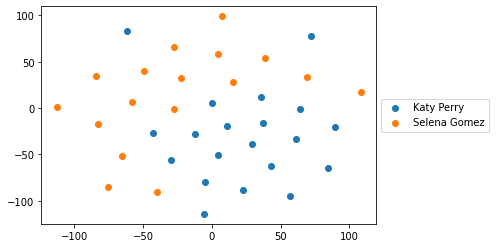

In [ ]:
import pandas as pd

fig2, ax = plt.subplots()

groups = pd.DataFrame(hog_tsne, columns=['x', 'y']).assign(category=hogLabels).groupby('category')
for name, points in groups:
    ax.scatter(points.x, points.y, label=name)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


Two regions can be clearly distinguished, even if there are some outliers. Blue dots represent instances correspondant to Katy Perry and orange dots to Selena Gómez. It´s important to remember that this method is unsupervised.

Now, the t-SNEs of the HOG features of the test data are obtained and plot. Again, two regions can be seen.

t-SNE done! Time elapsed: 0.18613314628601074 seconds


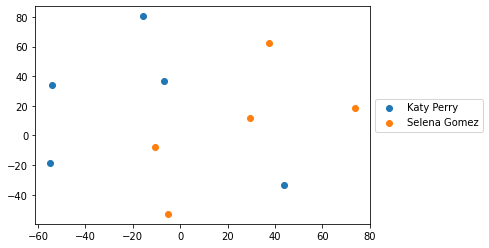

In [ ]:
time_start = time.time()
hog_tsne2 = TSNE(random_state=RS).fit_transform(hogFeaturesTest)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

fig2, ax = plt.subplots()


groups2 = pd.DataFrame(hog_tsne2, columns=['x', 'y']).assign(category=hogLabelsExpected).groupby('category')
for name, points in groups2:
    ax.scatter(points.x, points.y, label=name)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In the following code the t-SNEs for the HOGs of the lookalikes are calculated and plot. In this case there are not clearly defined regions for the points correspondent to the different two persons.

t-SNE done! Time elapsed: 0.2214958667755127 seconds


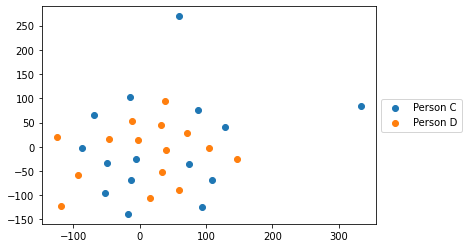

In [ ]:
time_start = time.time()
hog_tsne3 = TSNE(random_state=RS).fit_transform(hogFeaturesTest2)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

fig2, ax = plt.subplots()
    

groups3 = pd.DataFrame(hog_tsne3, columns=['x', 'y']).assign(category=hogLabelsExpected2).groupby('category')
for name, points in groups3:
    ax.scatter(points.x, points.y, label=name)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### **5.2.1.2 HOG features and kNN**

k-Nearest Neighbors is a supervised algorithm which we have also used for making predictions with HOG features. kNN takes the assumption that points that are close in a n-dimension space are similar. Consequently, taking k as a design parameter, an instance would be predicted as the majority class of the k nearest neighbors in that dimensional space.

This way of measuring similarities is used here with HOG features. More info about this technique can be found in https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761.

The predictions for our training set setting k to 3 is here implemented:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)

#Train the model using the training sets
knn.fit(hogFeatures, hogLabels)

#Predict the response for test dataset
y_predknnhog = knn.predict(hogFeaturesTest)

print("Accuracy:",metrics.accuracy_score(hogLabelsExpected, y_predknnhog))

for idx in range(len(y_predknnhog)):
    print("\nPredicted: ", y_predknnhog[idx], ". Expected: ", hogLabelsExpected[idx])

Accuracy: 0.9

Predicted:  Katy Perry . Expected:  Katy Perry

Predicted:  Katy Perry . Expected:  Katy Perry

Predicted:  Katy Perry . Expected:  Katy Perry

Predicted:  Katy Perry . Expected:  Katy Perry

Predicted:  Katy Perry . Expected:  Katy Perry

Predicted:  Selena Gomez . Expected:  Selena Gomez

Predicted:  Selena Gomez . Expected:  Selena Gomez

Predicted:  Katy Perry . Expected:  Selena Gomez

Predicted:  Selena Gomez . Expected:  Selena Gomez

Predicted:  Selena Gomez . Expected:  Selena Gomez


An accuracy of 0.9 is obtained. Consequently kNN is performing worse than SVM, for which we obtained an accuracy of 1.

Now we set k to 5:

In [ ]:
#Create KNN Classifier , now 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(hogFeatures, hogLabels)

#Predict the response for test dataset
y_predknnhog = knn.predict(hogFeaturesTest)

print("Accuracy:",metrics.accuracy_score(hogLabelsExpected, y_predknnhog))

for idx in range(len(y_predknnhog)):
    print("\nPredicted: ", y_predknnhog[idx], ". Expected: ", hogLabelsExpected[idx])

Accuracy: 0.7

Predicted:  Katy Perry . Expected:  Katy Perry

Predicted:  Katy Perry . Expected:  Katy Perry

Predicted:  Katy Perry . Expected:  Katy Perry

Predicted:  Katy Perry . Expected:  Katy Perry

Predicted:  Katy Perry . Expected:  Katy Perry

Predicted:  Selena Gomez . Expected:  Selena Gomez

Predicted:  Selena Gomez . Expected:  Selena Gomez

Predicted:  Katy Perry . Expected:  Selena Gomez

Predicted:  Katy Perry . Expected:  Selena Gomez

Predicted:  Katy Perry . Expected:  Selena Gomez


The accuracy was 0.7, inferior to the one achieved with k = 3. This shows a decrease in the performance of the predictions when incrementing the k nearest neighbors to take into account for HOG features.

kNN with the lookalikes set is also implemented for k=3 and k=5:

In [ ]:
#lookalikes

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)

#Train the model using the training sets
knn.fit(hogFeatures, hogLabels)

#Predict the response for test dataset
y_predknnhog = knn.predict(hogFeaturesTest2)

personcwhenkaty2 = 0
persondwhenselena2 = 0
persondwhenkaty2 = 0
personcwhenselena2 = 0

for idx in range(len(labelsPredictedHOG2)):
    print("\nPredicted: ", y_predknnhog[idx], ". Real person: ", hogLabelsExpected2[idx])
    

    if(labelsPredictedHOG2[idx]=="Katy Perry" and hogLabelsExpected2[idx]=="Person C"):
      personcwhenkaty2 = personcwhenkaty2 + 1;
    elif(labelsPredictedHOG2[idx]=="Katy Perry" and hogLabelsExpected2[idx]=="Person D"):
      persondwhenkaty2 = persondwhenkaty2 + 1;
    elif(labelsPredictedHOG2[idx]=="Selena Gomez" and hogLabelsExpected2[idx]=="Person C"):
      personcwhenselena2 = personcwhenselena2 + 1;
    elif(labelsPredictedHOG2[idx]=="Selena Gomez" and hogLabelsExpected2[idx]=="Person D"):
      persondwhenselena2 = persondwhenselena2 + 1;


Predicted:  Katy Perry . Real person:  Person C

Predicted:  Katy Perry . Real person:  Person C

Predicted:  Katy Perry . Real person:  Person C

Predicted:  Katy Perry . Real person:  Person C

Predicted:  Katy Perry . Real person:  Person C

Predicted:  Katy Perry . Real person:  Person C

Predicted:  Katy Perry . Real person:  Person C

Predicted:  Katy Perry . Real person:  Person C

Predicted:  Katy Perry . Real person:  Person C

Predicted:  Katy Perry . Real person:  Person C

Predicted:  Katy Perry . Real person:  Person C

Predicted:  Katy Perry . Real person:  Person C

Predicted:  Katy Perry . Real person:  Person C

Predicted:  Katy Perry . Real person:  Person C

Predicted:  Katy Perry . Real person:  Person C

Predicted:  Katy Perry . Real person:  Person D

Predicted:  Katy Perry . Real person:  Person D

Predicted:  Katy Perry . Real person:  Person D

Predicted:  Selena Gomez . Real person:  Person D

Predicted:  Katy Perry . Real person:  Person D

Predicted:  Katy 

In [ ]:
print("\nPerson C was predicted as Katy Perry: ", personcwhenkaty2 , "times\n")
print("Person C was predicted as Selena Gomez: ", personcwhenselena2 , "times\n")
print("Person D was predicted as Katy Perry: ", persondwhenkaty2 , "times\n")
print("Person D was predicted as Selena Gomez: ", persondwhenselena2 , "times\n")


Person C was predicted as Katy Perry:  13 times

Person C was predicted as Selena Gomez:  2 times

Person D was predicted as Katy Perry:  6 times

Person D was predicted as Selena Gomez:  9 times



In [ ]:
#lookalikes

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(hogFeatures, hogLabels)

#Predict the response for test dataset
y_predknnhog = knn.predict(hogFeaturesTest2)

personcwhenkaty3 = 0
persondwhenselena3 = 0
persondwhenkaty3 = 0
personcwhenselena3 = 0

for idx in range(len(labelsPredictedHOG2)):
    print("\nPredicted: ", y_predknnhog[idx], ". Real person: ", hogLabelsExpected2[idx])
    

    if(labelsPredictedHOG2[idx]=="Katy Perry" and hogLabelsExpected2[idx]=="Person C"):
      personcwhenkaty3 = personcwhenkaty3 + 1;
    elif(labelsPredictedHOG2[idx]=="Katy Perry" and hogLabelsExpected2[idx]=="Person D"):
      persondwhenkaty3 = persondwhenkaty3 + 1;
    elif(labelsPredictedHOG2[idx]=="Selena Gomez" and hogLabelsExpected2[idx]=="Person C"):
      personcwhenselena3 = personcwhenselena3 + 1;
    elif(labelsPredictedHOG2[idx]=="Selena Gomez" and hogLabelsExpected2[idx]=="Person D"):
      persondwhenselena3 = persondwhenselena3 + 1;


Predicted:  Katy Perry . Real person:  Person C

Predicted:  Katy Perry . Real person:  Person C

Predicted:  Katy Perry . Real person:  Person C

Predicted:  Katy Perry . Real person:  Person C

Predicted:  Katy Perry . Real person:  Person C

Predicted:  Katy Perry . Real person:  Person C

Predicted:  Katy Perry . Real person:  Person C

Predicted:  Katy Perry . Real person:  Person C

Predicted:  Katy Perry . Real person:  Person C

Predicted:  Katy Perry . Real person:  Person C

Predicted:  Katy Perry . Real person:  Person C

Predicted:  Katy Perry . Real person:  Person C

Predicted:  Katy Perry . Real person:  Person C

Predicted:  Katy Perry . Real person:  Person C

Predicted:  Katy Perry . Real person:  Person C

Predicted:  Katy Perry . Real person:  Person D

Predicted:  Katy Perry . Real person:  Person D

Predicted:  Katy Perry . Real person:  Person D

Predicted:  Katy Perry . Real person:  Person D

Predicted:  Katy Perry . Real person:  Person D

Predicted:  Katy Pe

In [ ]:
print("\nPerson C was predicted as Katy Perry: ", personcwhenkaty3 , "times\n")
print("Person C was predicted as Selena Gomez: ", personcwhenselena3 , "times\n")
print("Person D was predicted as Katy Perry: ", persondwhenkaty3 , "times\n")
print("Person D was predicted as Selena Gomez: ", persondwhenselena3 , "times\n")


Person C was predicted as Katy Perry:  13 times

Person C was predicted as Selena Gomez:  2 times

Person D was predicted as Katy Perry:  6 times

Person D was predicted as Selena Gomez:  9 times



In this case we can see that the results for the lookalikes are the same for k = 3 and k = 5. It should be noted that also the same result as the one obtained using SVM is achieved using the lookalikes set.

In [ ]:
import warnings
from skimage.measure import compare_ssim
from skimage.transform import resize
from scipy.stats import wasserstein_distance
from scipy.misc import imsave
from scipy.ndimage import imread
import numpy as np
import cv2

## 5.2.2 K means clustering with PCA

First, we plot our feature space. We use PCA with 2, 5, 10, 20 and 37 components to reduce the dimensionality of the images. Then, we use t-SNE to plot the results in a 2-D space. 

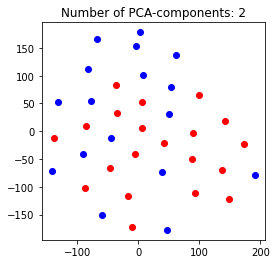

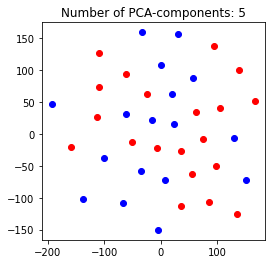

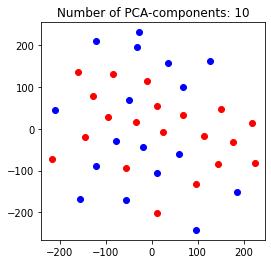

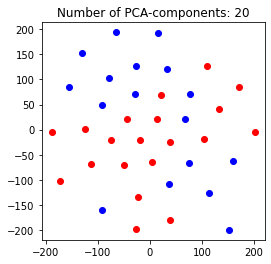

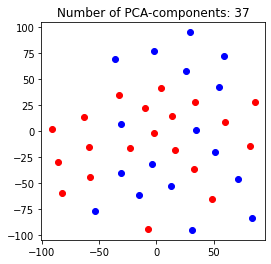

In [ ]:
# Lets use t-SNE with different number of PCA components
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=0)

components = [2,5,10,20,37]
ncomponents = len(components)

# performing pca and then t-SNE
for i in range(ncomponents):
  pca = PCA(n_components=components[i])
  pca.fit(matrix)

  matrix_pca = pca.transform(matrix)
  reduced_pca = tsne.fit_transform(matrix_pca)

  plt.figure(figsize=(4, 4))
  plt.scatter(x = reduced_pca[0:n_train_A,0], y=reduced_pca[:n_train_A,1], c='r')
  plt.scatter(x = reduced_pca[n_train_A:,0], y=reduced_pca[n_train_A:,1], c='b')
  plt.title('Number of PCA-components: '+ str(components[i]))
  plt.show()


As we can see, it does not seem we are obtaining very promising results. Clusters does not seem to be formed. However, since we are using tSNE to plot everything in two dimensions, there is still a place for hope, since the clusters might be forming in the high dimension, but are disrupted when plotting in only two dimensions. 

First, let's see if KNN works with this data. We try with 3,5,7, and 11 neighbours. 

In [ ]:
y1 = np.zeros(n_train_A)
y2 = np.ones(n_train_B)
y = np.append(y1, y2)

y1 = np.zeros(n_test_A)
y2 = np.ones(n_test_B)
y_test = np.append(y1, y2)

In [ ]:
# Lets reconstruct some faces using different components

# Neighbourhood sizes
n_neighs = [3,5,7,11]

# perform pca with different number of components
for i in range(ncomponents):
  pca = PCA(n_components=components[i])
  pca.fit(matrix)
  matrix_pca = pca.transform(matrix)
  matrix_test_pca = pca.transform(matrix_test)

  # perform KNN with different neighborhood sizes
  for j in range(len(n_neighs)):
    neigh = KNeighborsClassifier(n_neighs[j])
    neigh.fit(matrix_pca, y)

    # Predicting on train data
    print('\n%dNN with %d components' % (n_neighs[j], components[i]))
    preds = neigh.predict(matrix_pca)
    acc = (preds == y).sum().item() / n_train
    print('Train accuracy: %f' % (acc))
    #print('Confusion matrix:\n')
    #print(confusion_matrix(preds, y))
    # Predicting on test data
    preds = neigh.predict(matrix_test_pca)
    acc = (preds == y_test).sum().item() / n_test
    print('Test accuracy: %f\n' % (acc))
    #print('Confusion matrix:\n')
    #print(confusion_matrix(preds, y_test))



3NN with 2 components
Train accuracy: 0.783784
Test accuracy: 0.900000


5NN with 2 components
Train accuracy: 0.729730
Test accuracy: 0.700000


7NN with 2 components
Train accuracy: 0.702703
Test accuracy: 0.600000


11NN with 2 components
Train accuracy: 0.702703
Test accuracy: 0.600000


3NN with 5 components
Train accuracy: 0.864865
Test accuracy: 0.600000


5NN with 5 components
Train accuracy: 0.756757
Test accuracy: 0.700000


7NN with 5 components
Train accuracy: 0.756757
Test accuracy: 0.800000


11NN with 5 components
Train accuracy: 0.756757
Test accuracy: 0.800000


3NN with 10 components
Train accuracy: 0.864865
Test accuracy: 0.900000


5NN with 10 components
Train accuracy: 0.837838
Test accuracy: 0.900000


7NN with 10 components
Train accuracy: 0.837838
Test accuracy: 0.800000


11NN with 10 components
Train accuracy: 0.756757
Test accuracy: 0.700000


3NN with 20 components
Train accuracy: 0.918919
Test accuracy: 0.900000


5NN with 20 components
Train accuracy: 0.8

KNN does not perform bad. It is a very quick method in this scenario (no training and <.01s classification time). However, we do not achieve a 100% accuracy .We obtained it with 3NN and 37 components on test, but not on training, suggesting it might be a little lucky, due to the reduced dataset. 

Let's try now K-means. 

In [ ]:
for i in range(ncomponents):
  pca = PCA(n_components=components[i])
  pca.fit(matrix)
  matrix_pca = pca.transform(matrix)
  matrix_test_pca = pca.transform(matrix_test)

  kmeans=KMeans(n_clusters= 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(matrix_pca)


  # Predicting on train data
  print('\nK-Means with %d components' % (components[i]))
  preds = kmeans.fit_predict(matrix_pca)
  acc = (preds == y).sum().item() / n_train
  print('Train accuracy: %f' % (acc))

  # Predicting on test data
  preds = kmeans.fit_predict(matrix_test_pca)
  acc = (preds == y_test).sum().item() / n_test
  print('Test accuracy: %f\n' % (acc))


K-Means with 2 components
Train accuracy: 0.432432
Test accuracy: 0.600000


K-Means with 5 components
Train accuracy: 0.432432
Test accuracy: 0.700000


K-Means with 10 components
Train accuracy: 0.459459
Test accuracy: 0.800000


K-Means with 20 components
Train accuracy: 0.432432
Test accuracy: 0.700000


K-Means with 37 components
Train accuracy: 0.432432
Test accuracy: 0.700000



As expected, the results were even worse than with KNN, since clustering were not forming. This may be because PCA does not take into account classes in order to reduce dimensionality, only variation amongst all the datapoints. If differences between the classes are more subtle, it is not a reliable classifying/identyfing algorithm. As we saw in section 5.1.2, it is useful if combined with other ML algorithms. 

## 5.2.3 Identification using vgg face features





In [ ]:
vgg_face=Model(inputs=model.layers[0].input,outputs=model.layers[-2].output)

In [ ]:
x_train_features=[]
y_train_features=[]
person_folders=os.listdir('/content/CV_ASS/Train/')
person_rep=dict()
for i,person in enumerate(person_folders):
  person_rep[i]=person
  print(person)
  image_names=os.listdir('/content/CV_ASS/Train/'+person+'/')
  for image_name in image_names:
    img=load_img('/content/CV_ASS/Train/'+person+'/'+image_name,target_size=(224,224))
    
    img=img_to_array(img)
    
    img=np.expand_dims(img,axis=0)
    img=preprocess_input(img)
   
    img_encode=vgg_face(img)
    
    
    #print(img_encode)    
    x_train_features.append(np.squeeze(K.eval(img_encode)).tolist())
    y_train_features.append(i)
x_train_features=np.array(x_train_features)
y_train_features=np.array(y_train_features)




A
B


In [ ]:
a= K.eval(img_encode)
print (a)
a.shape


[[ 1.9031312 -1.9568421 -3.277789  ... -1.8951159  1.3181653  1.2533764]]


(1, 2622)

### Feature visualisation of the training data encoded with vgg features using t-SNE

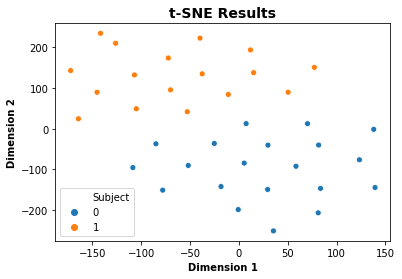

In [ ]:
x = list(x_train_features)

y = list(y_train_features)
df = pd.DataFrame({'Embeddings': x, 'Subject': y})



X_embedded = TSNE(n_components=2).fit_transform(x)


df['Subject'] = df['Subject'].astype('category')
sns.scatterplot(X_embedded[:,0], X_embedded[:,1],legend='full', hue=df['Subject'])
plt.title('t-SNE Results', weight='bold').set_fontsize('14')
plt.xlabel('Dimension 1', weight='bold').set_fontsize('10')
plt.ylabel('Dimension 2', weight='bold').set_fontsize('10')
plt.show()

We can see that features are already forming distinct clusters

### K means clustering using VGG features

In [ ]:
kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter =2000, n_init = 10, random_state = 0)
kmeans.fit(x_train_features)
kmeans=KMeans(n_clusters= 2, init = 'k-means++', max_iter = 2000, n_init = 10, random_state = 0)


In [ ]:
x_test=[]
y_test=[]
person_folders=os.listdir('/content/CV_ASS/Testing/Test')
for i,person in enumerate(person_folders):
  image_names=os.listdir('/content/CV_ASS/Testing/Test/'+person+'/')
  for image_name in image_names:
    img=load_img(path+'/Testing/Test/'+person+'/'+image_name,target_size=(224,224))
    #print (image_name)
    img=img_to_array(img)
    img=np.expand_dims(img,axis=0)
    img=preprocess_input(img)
    img_encode=vgg_face(img)
    x_test.append(np.squeeze(K.eval(img_encode)).tolist())
    y_test.append(i)
x_test=np.array(x_test)
y_test=np.array(y_test)


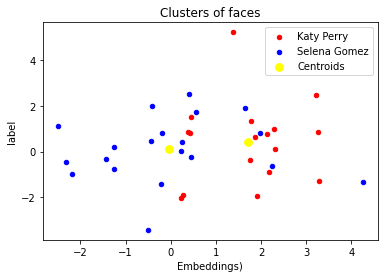

In [ ]:
y_kmeans = kmeans.fit_predict(x_test)
plt.scatter(x_train_features[y_kmeans == 0, 0], x_train_features[y_kmeans == 0,1],s = 20, c='red', label = 'Katy Perry')

plt.scatter(x_train_features[y_kmeans == 1, 0], x_train_features[y_kmeans == 1,1],s = 20, c='blue', label = 'Selena Gomez')




plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 60, c = 'yellow', label = 'Centroids')
    
plt.title('Clusters of faces')
plt.xlabel('Embeddings)')
plt.ylabel('label')
plt.legend()
plt.show()

### K Nearest Neighbour using VGG features

Test images are forming 2 distinct clusters except outliers

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
# K=5
knn_model_5 = KNeighborsClassifier(5)
knn_model_5.fit(x_train_features, y_train_features) 
y_prediction_5 = knn_model_5.predict(x_test)

# K=3
knn_model_3 = KNeighborsClassifier(3)
knn_model_3.fit(x_train_features, y_train_features) 
y_prediction_3 = knn_model_3.predict(x_test)

# K=1
knn_model_1 = KNeighborsClassifier(1)
knn_model_1.fit(x_train_features, y_train_features) 
y_prediction_1 = knn_model_1.predict(x_test)

# Accuracy
from sklearn.metrics import accuracy_score
print('\n')
print('Accuracy with K=5:', accuracy_score(y_test, y_prediction_5))
print('Accuracy with K=3:', accuracy_score(y_test, y_prediction_3))
print('Accuracy with K=1:', accuracy_score(y_test, y_prediction_1))
print('\n')




Accuracy with K=5: 1.0
Accuracy with K=3: 1.0
Accuracy with K=1: 1.0




We observe that the best accuracy is obtained using K =1

### **K means for For Look alikes**

In [ ]:
x_test_lookalikes=[]
y_test_lookalikes=[]
person_folders=os.listdir('/content/CV_ASS/LookAlikes/')
for i,person in enumerate(person_folders):
  image_names=os.listdir('/content/CV_ASS/LookAlikes/')
  for image_name in image_names:
    img=load_img('/content/CV_ASS/LookAlikes/'+image_name,target_size=(224,224))
    #print (image_name)
    img=img_to_array(img)
    img=np.expand_dims(img,axis=0)
    img=preprocess_input(img)
    img_encode=vgg_face(img)
    x_test_lookalikes.append(np.squeeze(K.eval(img_encode)).tolist())
    y_test_lookalikes.append(i)
x_test_lookalikes=np.array(x_test_lookalikes)
y_test_lookalikes=np.array(y_test_lookalikes)


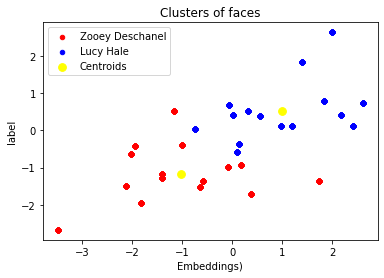

In [ ]:

y_kmeans = kmeans.fit_predict(x_test_lookalikes)
plt.scatter(x_test_lookalikes[y_kmeans == 0, 0], x_test_lookalikes[y_kmeans == 0,1],s = 20, c='red', label = 'Zooey Deschanel')

plt.scatter(x_test_lookalikes[y_kmeans == 1, 0], x_test_lookalikes[y_kmeans == 1,1],s = 20, c='blue', label = 'Lucy Hale')




plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 60, c = 'yellow', label = 'Centroids')
    
plt.title('Clusters of faces')
plt.xlabel('Embeddings)')
plt.ylabel('label')
plt.legend()
plt.show()

look alikes also forms a distinct cluster when feature encoded with vgg face

### **Face Verification : Testing the Similariy between the images**




In [ ]:
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

In [ ]:
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img

In [ ]:
epsilon = 0.40 #cosine similarity
#epsilon = 120 #euclidean distance
def findCosineDistance(source_representation, test_representation):
    a = np.matmul(np.transpose(source_representation), test_representation)
    b = np.sum(np.multiply(source_representation, source_representation))
    c = np.sum(np.multiply(test_representation, test_representation))
    return 1 - (a / (np.sqrt(b) * np.sqrt(c)))
 
def findEuclideanDistance(source_representation, test_representation):
    euclidean_distance = source_representation - test_representation
    euclidean_distance = np.sum(np.multiply(euclidean_distance, euclidean_distance))
    euclidean_distance = np.sqrt(euclidean_distance)
    return euclidean_distance

In [ ]:

episilon = 0.7#euclidean distance
 
def verifyFace(img1, img2):
 img1_representation = vgg_face_descriptor.predict(preprocess_image(img1))[0,:]
 img2_representation = vgg_face_descriptor.predict(preprocess_image(img2))[0,:]
 
 cosine_similarity = findCosineDistance(img1_representation, img2_representation)
 euclidean_distance = findEuclideanDistance(img1_representation, img2_representation)
 print("Cosine similarity:",cosine_similarity,"Eucledian distance:" ,euclidean_distance)
 
 if(euclidean_distance > episilon):
  print("verified... they are same person")
 else:
  print("unverified! they are not same person!")

In [ ]:
A1 = '/content/CV_ASS/Dataset_processed/PROC_A/A_1.jpg'
A2 = '/content/CV_ASS/Dataset_processed/PROC_A/A_10.jpg'
B1 = '/content/CV_ASS/Dataset_processed/PROC_B/B_10.jpg'
B2 = '/content/CV_ASS/Dataset_processed/PROC_B/B_11.jpg'
C='/content/CV_ASS/Dataset_processed/PROC_C/C_0.jpg'
D='/content/CV_ASS/Dataset_processed/PROC_D/D_1.jpg'
print("Testing 2 images from Class A..")

verifyFace(A1,A2)
print("----------------------------------")
print("Testing 2 images from Class B..")


verifyFace(B1,B2)
print("----------------------------------")
print("Testing  image from Class A and Class B..")

verifyFace(A1,B2)
print("----------------------------------")

print("Testing  image from Class A and Class C..")

verifyFace(A1,C)
print("----------------------------------")

print("Testing  image from Class B and Class C..")

verifyFace(B1,C)
print("----------------------------------")

print("Testing  image from Class A and Class D..")

verifyFace(A1,D)
print("----------------------------------")

print("Testing  image from Class B and Class D..")

verifyFace(B1,D)
print("----------------------------------")

Testing 2 images from Class A..
Cosine similarity: 0.5934863686561584 Eucledian distance: 154.1167
verified... they are same person
----------------------------------
Testing 2 images from Class B..
Cosine similarity: 0.21442925930023193 Eucledian distance: 67.92137
verified... they are same person
----------------------------------
Testing  image from Class A and Class B..
Cosine similarity: 0.6480502784252167 Eucledian distance: 126.4918
verified... they are same person
----------------------------------
Testing  image from Class A and Class C..
Cosine similarity: 0.6000072360038757 Eucledian distance: 124.11901
verified... they are same person
----------------------------------
Testing  image from Class B and Class C..
Cosine similarity: 0.6142640113830566 Eucledian distance: 115.74958
verified... they are same person
----------------------------------
Testing  image from Class A and Class D..
Cosine similarity: 0.5759865045547485 Eucledian distance: 171.18948
verified... they are s


This is one shot learning process.  we would not feed multiple images of a person to network. Suppose that we store a picture of a person on our database, and we would take a photo of that one in the entrance of building and verify him. This process can be called face verification instead of face recognition.





### **Identify images using K Nearest Neighbour**

---



---



In [ ]:
#train data
x_train=[]
y_train=[]
person_folders=os.listdir('/content/CV_ASS/Train/')
person_rep=dict()
for i,person in enumerate(person_folders):
  person_rep[i]=person
  print(person)
  image_names=os.listdir('/content/CV_ASS/Train/'+person+'/')
  for image_name in image_names:
    img=cv2.imread('/content/CV_ASS/Train/'+person+'/'+image_name)
    img=cv2.resize(img,(224,224))
    x_train.append(img)
    y_train.append(i)

A
B


In [ ]:
#Prepare Test Data
from matplotlib.pyplot import imshow
import cv2
x_test=[]
y_test=[]
person_folders=os.listdir('/content/CV_ASS/Testing/Test')
for i,person in enumerate(person_folders):
  image_names=os.listdir('/content/CV_ASS/Testing/Test/'+person+'/')
  for image_name in image_names:
    img=cv2.imread('/content/CV_ASS/Testing/Test/'+person+'/'+image_name)
    img=cv2.resize(img,(224,224))
    #print (image_name)
    #img=img_to_array(img)
    #img=np.expand_dims(img,axis=0)
    #img=preprocess_input(img)
    #img_encode=vgg_face(img)
    x_test.append(img)
    y_test.append(i)

In [ ]:
#(train_img, test_img, train_y, test_y) = train_test_split(x_train, y_train, test_size=0.25)
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [ ]:
X_train = x_train.reshape(len(x_train),3*224*224)
X_test = x_test.reshape(len(x_test),3*224*224)



Accuracy with K=5: 0.8378378378378378
Accuracy with K=3: 0.8648648648648649
Accuracy with K=1: 1.0




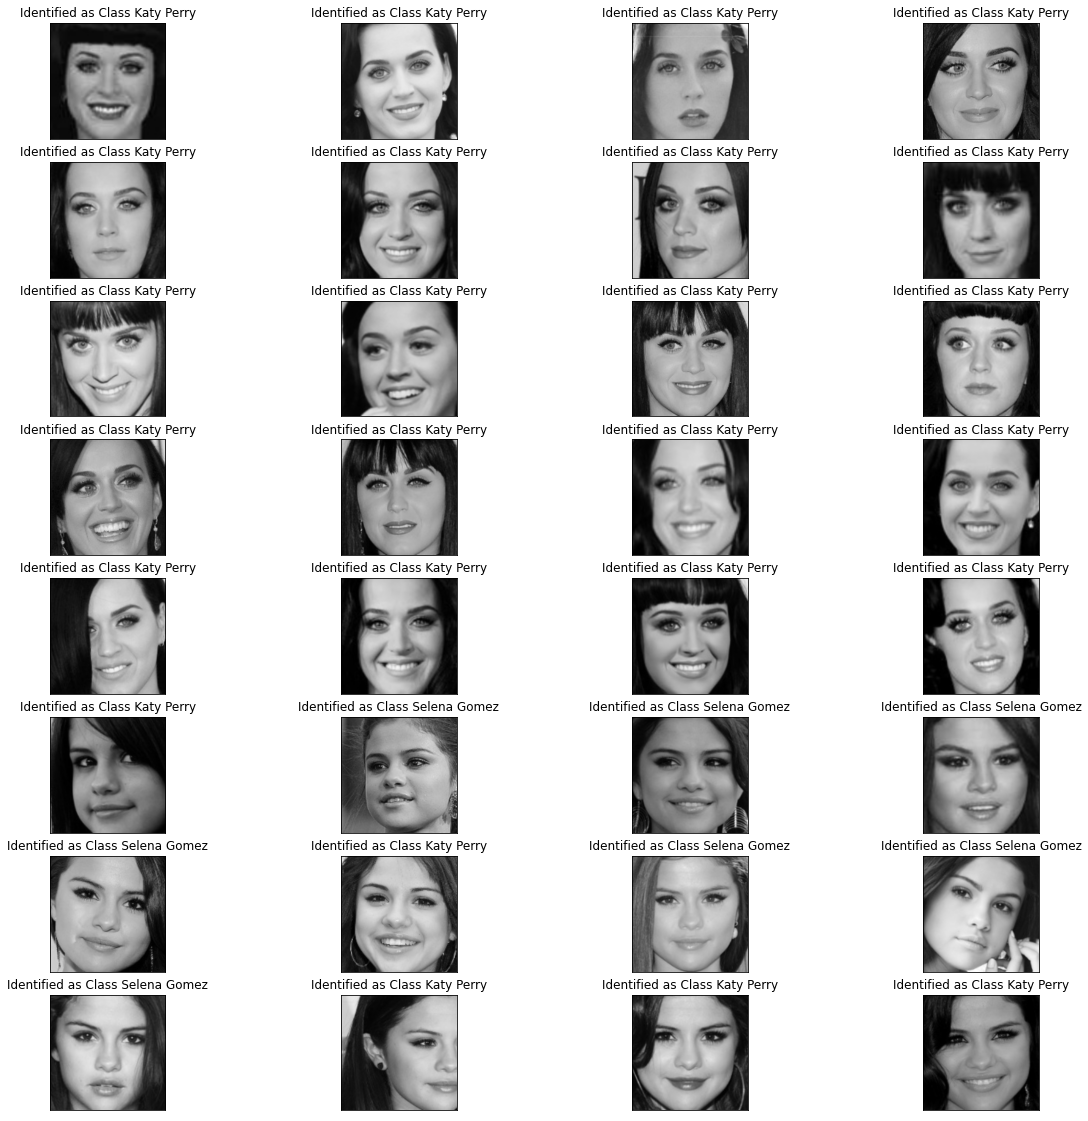

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
# K=5
knn_model_5 = KNeighborsClassifier(5)
knn_model_5.fit(X_train, y_train) 
y_prediction_5 = knn_model_5.predict(X_test)

# K=3
knn_model_3 = KNeighborsClassifier(3)
knn_model_3.fit(X_train, y_train) 
y_prediction_3 = knn_model_3.predict(X_test)

# K=1
knn_model_1 = KNeighborsClassifier(1)
knn_model_1.fit(X_train, y_train) 
y_prediction_1 = knn_model_1.predict(X_test)

# Accuracy
from sklearn.metrics import accuracy_score
print('\n')
print('Accuracy with K=5:', accuracy_score(y_test, y_prediction_5))
print('Accuracy with K=3:', accuracy_score(y_test, y_prediction_3))
print('Accuracy with K=1:', accuracy_score(y_test, y_prediction_1))
print('\n')
#print(classification_report(y_test,y_prediction))
#k={0:'Katy perry',1:'Selena Gomez'}


fig, axes = plt.subplots(8, 4, figsize=(20,20),subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
  if(y_prediction_5[i]==0):
    out = "Katy Perry"
  else:
    out= "Selena Gomez"
  
  ax.title.set_text("Identified as Class {}".format(out))
  ax.imshow(x_test[i],cmap='gray')


In [ ]:
y_prediction_1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

We observe that K=1 gives the best accuracy so we choose K=1

###**KNN For look alikes**


In [ ]:
#Prepare Test Data
from matplotlib.pyplot import imshow
import cv2
x_test_lookalike=[]
y_test_lookalike=[]
person_folders=os.listdir('/content/CV_ASS/LookAlikes/')
for i,person in enumerate(person_folders):
  image_names=os.listdir('/content/CV_ASS/LookAlikes/')
  for image_name in image_names:
    img=cv2.imread('/content/CV_ASS/LookAlikes/'+image_name)
    img=cv2.resize(img,(224,224))
    #print (image_name)
    #img=img_to_array(img)
    #img=np.expand_dims(img,axis=0)
    #img=preprocess_input(img)
    #img_encode=vgg_face(img)
    x_test_lookalike.append(img)
    y_test_lookalike.append(i)

In [ ]:
x_test_lookalike = np.array(x_test_lookalike)
y_test_lookalike = np.array(y_test_lookalike)

In [ ]:
X_test_lookalike = x_test_lookalike.reshape(len(x_test_lookalike),3*224*224)



Accuracy with K=5: 0.03333333333333333




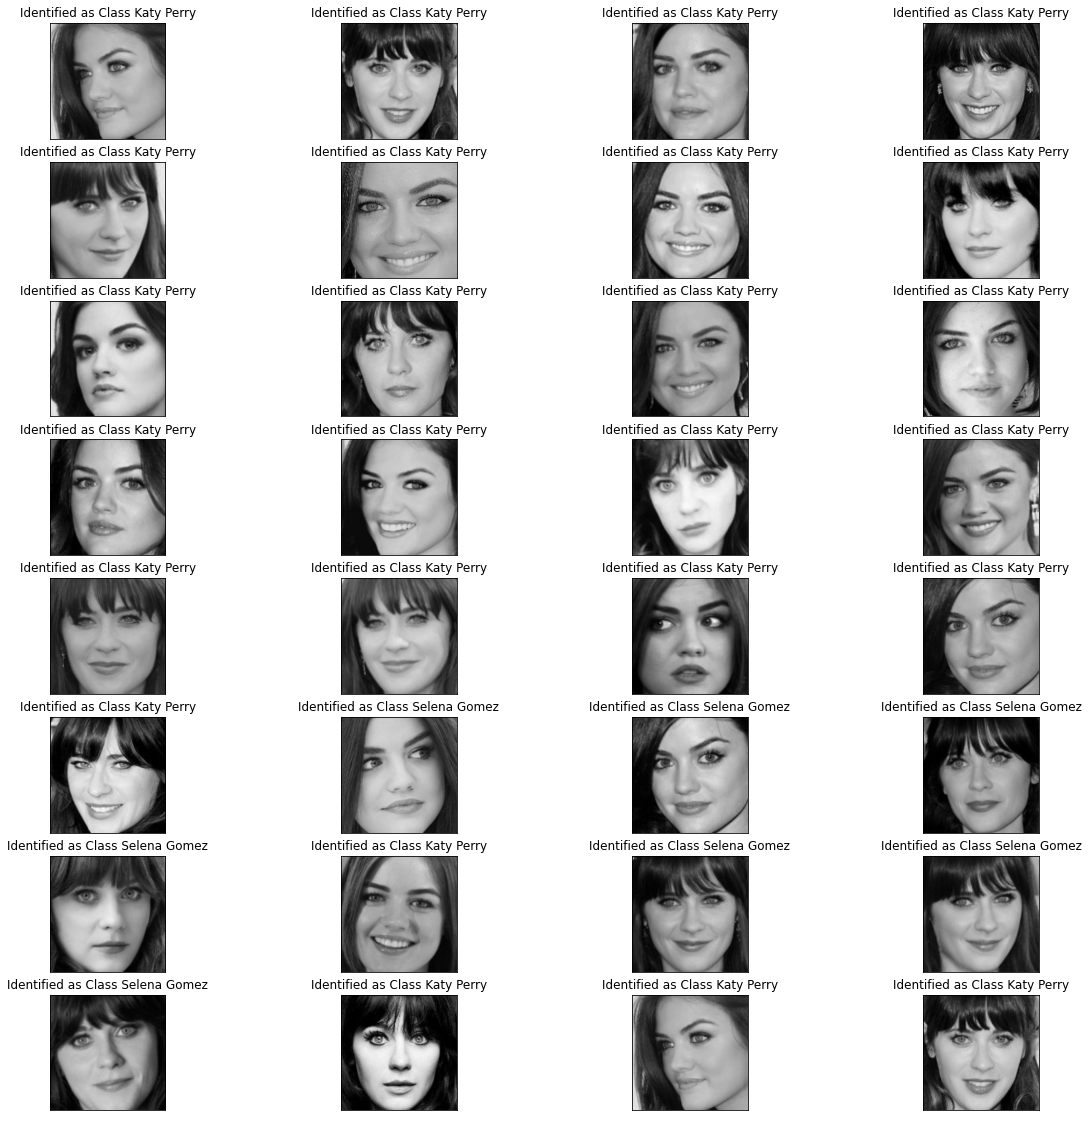

In [ ]:
y_prediction_5_lookalike = knn_model_5.predict(X_test_lookalike)
print('\n')
print('Accuracy with K=5:', accuracy_score(y_test_lookalike, y_prediction_5_lookalike))
print('\n')
#print(classification_report(y_test,y_prediction))
{0:'Katy perry',1:'Selena Gomez'}

fig, axes = plt.subplots(8, 4, figsize=(20,20),subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
  if(y_prediction_5[i]==0):
    out = "Katy Perry"
  else:
    out= "Selena Gomez"
  
  ax.title.set_text("Identified as Class {}".format(out))
  ax.imshow(x_test_lookalike[i],cmap='gray')

Here we observe that For the look aliikes most images of Person C is detected as Katy Perry and most images of Person D is detected as Selena gomez. Hence it is safe to conclude that Zooey Deschanel and Katy perry looks similar. and Selena homez and lucy hales look similar .

# 5.3 Impress Your TA

## 5.3.1 Histogram of Oriented Gradients (HOG features) - Impress your TAs - Rotating faces

In the following code we will show the performance of this method when rotating 90 degrees the images used as test data:

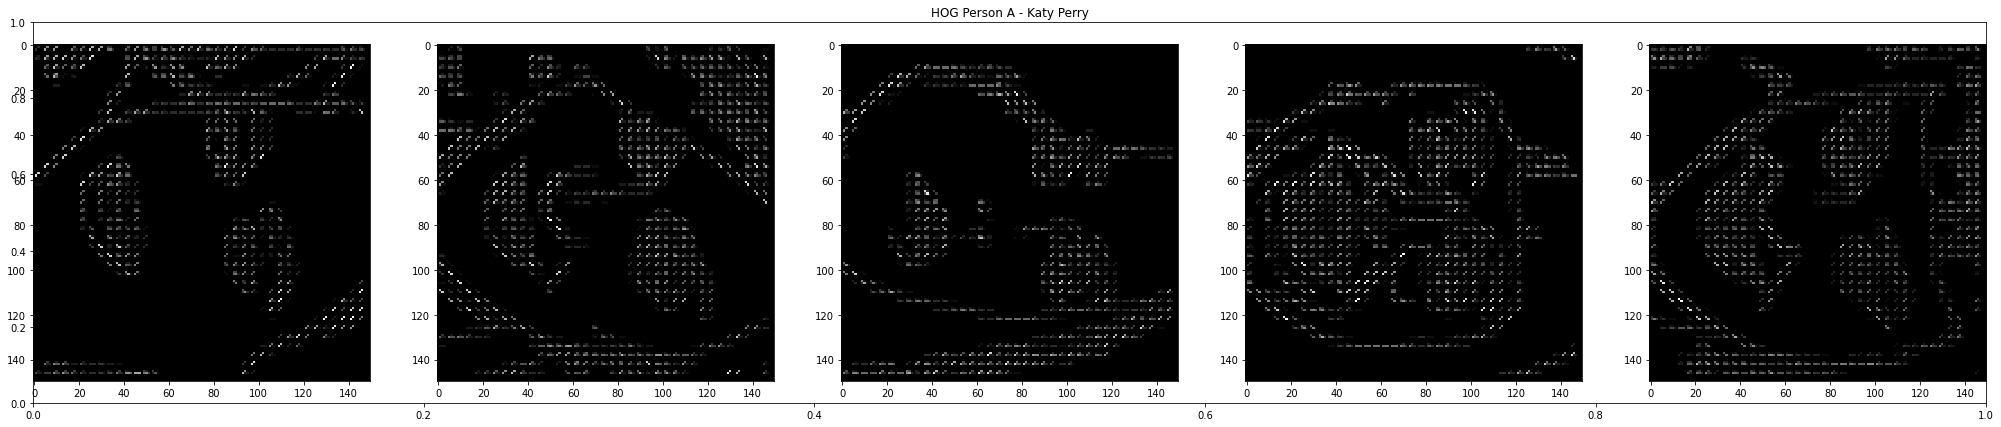

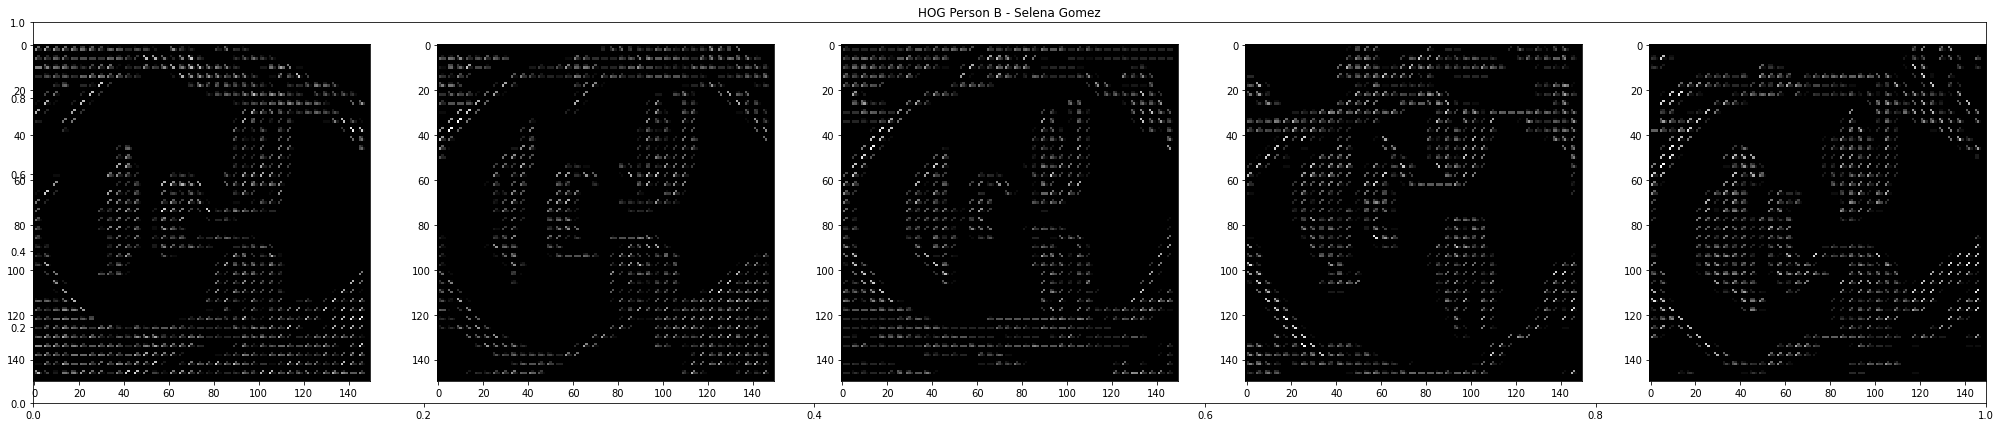

In [ ]:
#We plot HOG features of rotated images

fig = plt.figure(figsize=(35, 7))  # width, height in inches
plt.title('HOG Person A - Katy Perry')


fig2 = plt.figure(figsize=(35, 7))  # width, height in inches

plt.title('HOG Person B - Selena Gomez')


for i in range(len(hogImagesArot)):
    sub = fig.add_subplot(1, 5, i + 1)
    sub.imshow(hogImagesArot[i], interpolation='nearest')

for i in range(len(hogImagesBrot)):
    sub = fig2.add_subplot(1, 5, i + 1)
    sub.imshow(hogImagesBrot[i], interpolation='nearest')

In [ ]:
clf = svm.SVC(kernel='linear', C = 1.0)
clf.fit(hogFeatures, hogLabels)

labelsPredictedHOGRot = clf.predict(hogFeaturesTestRot)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(hogLabelsExpected, labelsPredictedHOGRot))
# Model Precision: TP/TP+FP
print("Precision:",metrics.precision_score(hogLabelsExpected, labelsPredictedHOGRot, pos_label="Katy Perry"))

# Model Recall: TP/TP+FN
print("Recall:",metrics.recall_score(hogLabelsExpected, labelsPredictedHOGRot, pos_label="Katy Perry"))

print(classification_report(hogLabelsExpected, labelsPredictedHOGRot))



for idx in range(len(labelsPredictedHOG)):
    print("\nPredicted: ", labelsPredictedHOGRot[idx], ". Expected: ", hogLabelsExpected[idx])

Accuracy: 0.5
Precision: 0.0
Recall: 0.0
              precision    recall  f1-score   support

  Katy Perry       0.00      0.00      0.00         5
Selena Gomez       0.50      1.00      0.67         5

    accuracy                           0.50        10
   macro avg       0.25      0.50      0.33        10
weighted avg       0.25      0.50      0.33        10


Predicted:  Selena Gomez . Expected:  Katy Perry

Predicted:  Selena Gomez . Expected:  Katy Perry

Predicted:  Selena Gomez . Expected:  Katy Perry

Predicted:  Selena Gomez . Expected:  Katy Perry

Predicted:  Selena Gomez . Expected:  Katy Perry

Predicted:  Selena Gomez . Expected:  Selena Gomez

Predicted:  Selena Gomez . Expected:  Selena Gomez

Predicted:  Selena Gomez . Expected:  Selena Gomez

Predicted:  Selena Gomez . Expected:  Selena Gomez

Predicted:  Selena Gomez . Expected:  Selena Gomez


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


These results show that HOG features do not work fine when images are rotated, as the histograms are included in a vector in a specific order depending on their position in the image. That is the reason this method breaks when doing predictions and classifications for rotated images.

## 5.3.2 Checking with spectacle with KNN

In [ ]:
from matplotlib.pyplot import imshow
import cv2
x_test_lookalike=[]
y_test_lookalike=[]
person_folders=os.listdir('/content/CV_ASS/Glass_processed/')
for i,person in enumerate(person_folders):
  image_names=os.listdir('/content/CV_ASS/Glass_processed/')
  for image_name in image_names:
    img=cv2.imread('/content/CV_ASS/Glass_processed/'+image_name)
    img=cv2.resize(img,(224,224))
    #print (image_name)
    #img=img_to_array(img)
    #img=np.expand_dims(img,axis=0)
    #img=preprocess_input(img)
    #img_encode=vgg_face(img)
    x_test_lookalike.append(img)
    y_test_lookalike.append(i)

In [ ]:
x_test_lookalike = np.array(x_test_lookalike)
y_test_lookalike = np.array(y_test_lookalike)

In [ ]:
X_test_lookalike = x_test_lookalike.reshape(len(x_test_lookalike),3*224*224)



Accuracy with K=5: 0.16666666666666666




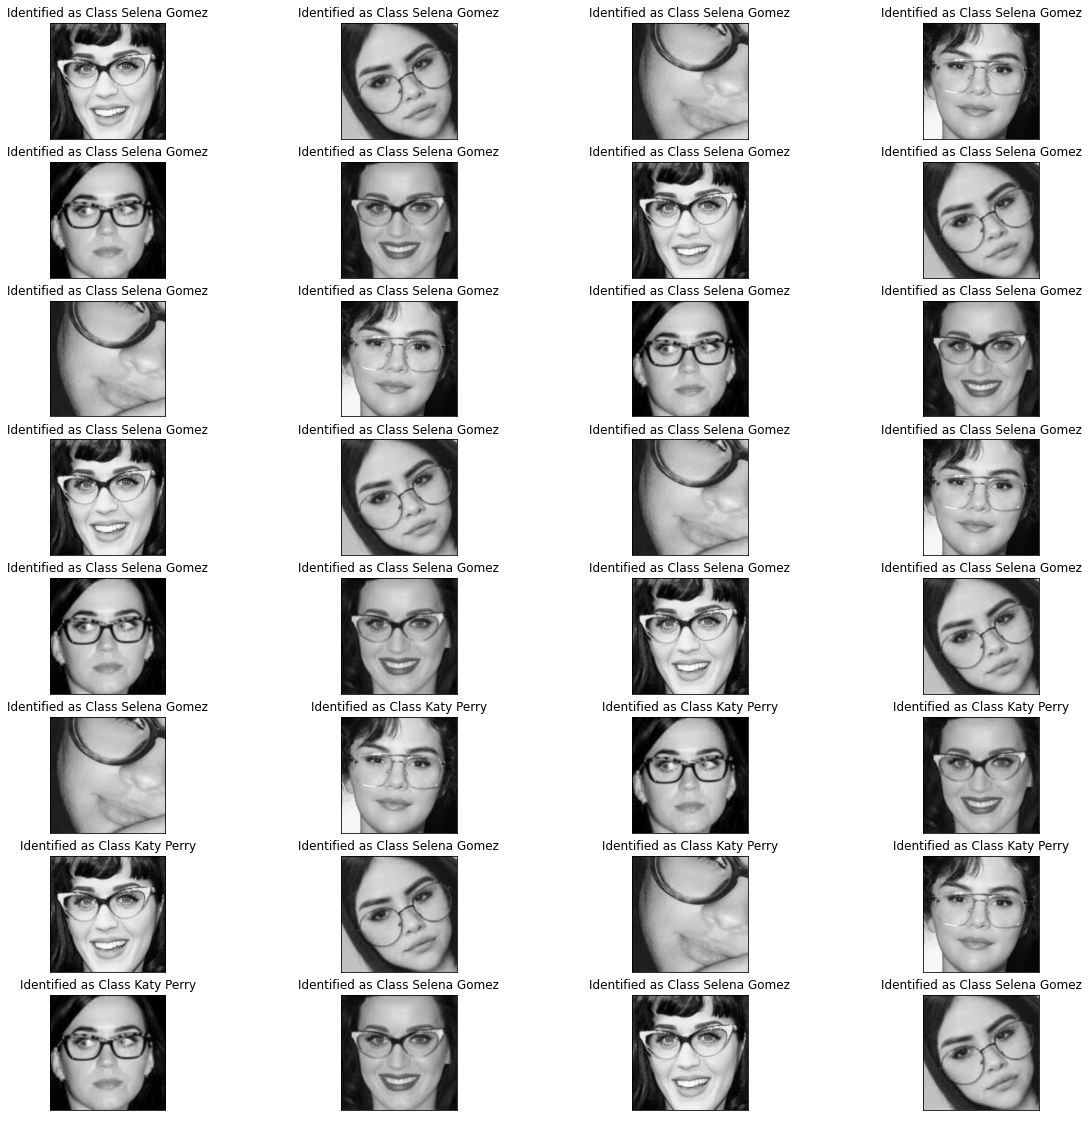

In [ ]:
y_prediction_5_lookalike = knn_model_5.predict(X_test_lookalike)
print('\n')
print('Accuracy with K=5:', accuracy_score(y_test_lookalike, y_prediction_5_lookalike))
print('\n')
#print(classification_report(y_test,y_prediction))
{0:'Katy perry',1:'Selena Gomez'}

fig, axes = plt.subplots(8, 4, figsize=(20,20),subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
  if(y_prediction_5[i]==1):
    out = "Katy Perry"
  else:
    out= "Selena Gomez"
  
  ax.title.set_text("Identified as Class {}".format(out))
  ax.imshow(x_test_lookalike[i],cmap='gray')

We observe that the test images with glasses obtains far less accuracy than normal test images. Reason being KNN is weak classifier. we can put few images with glasses in train set to obtain better performance

### Checking with Preprocessed Images using KNN



In [ ]:
from matplotlib.pyplot import imshow
import cv2
x_test_lookalike=[]
y_test_lookalike=[]
person_folders=os.listdir('/content/CV_ASS/LookAlikes/')
for i,person in enumerate(person_folders):
  image_names=os.listdir('/content/CV_ASS/LookAlikes/')
  for image_name in image_names:
    img=cv2.imread('/content/CV_ASS/LookAlikes/'+image_name)
    img=cv2.resize(img,(224,224))
    #print (image_name)
    #img=img_to_array(img)
    #img=np.expand_dims(img,axis=0)
    img=preprocess_input(img)
    #img_encode=vgg_face(img)
    x_test_lookalike.append(img)
    y_test_lookalike.append(i)

In [ ]:
x_test_lookalike = np.array(x_test_lookalike)
y_test_lookalike = np.array(y_test_lookalike)

In [ ]:
X_test_lookalike = x_test_lookalike.reshape(len(x_test_lookalike),3*224*224)



Accuracy with K=5: 0.03333333333333333




Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

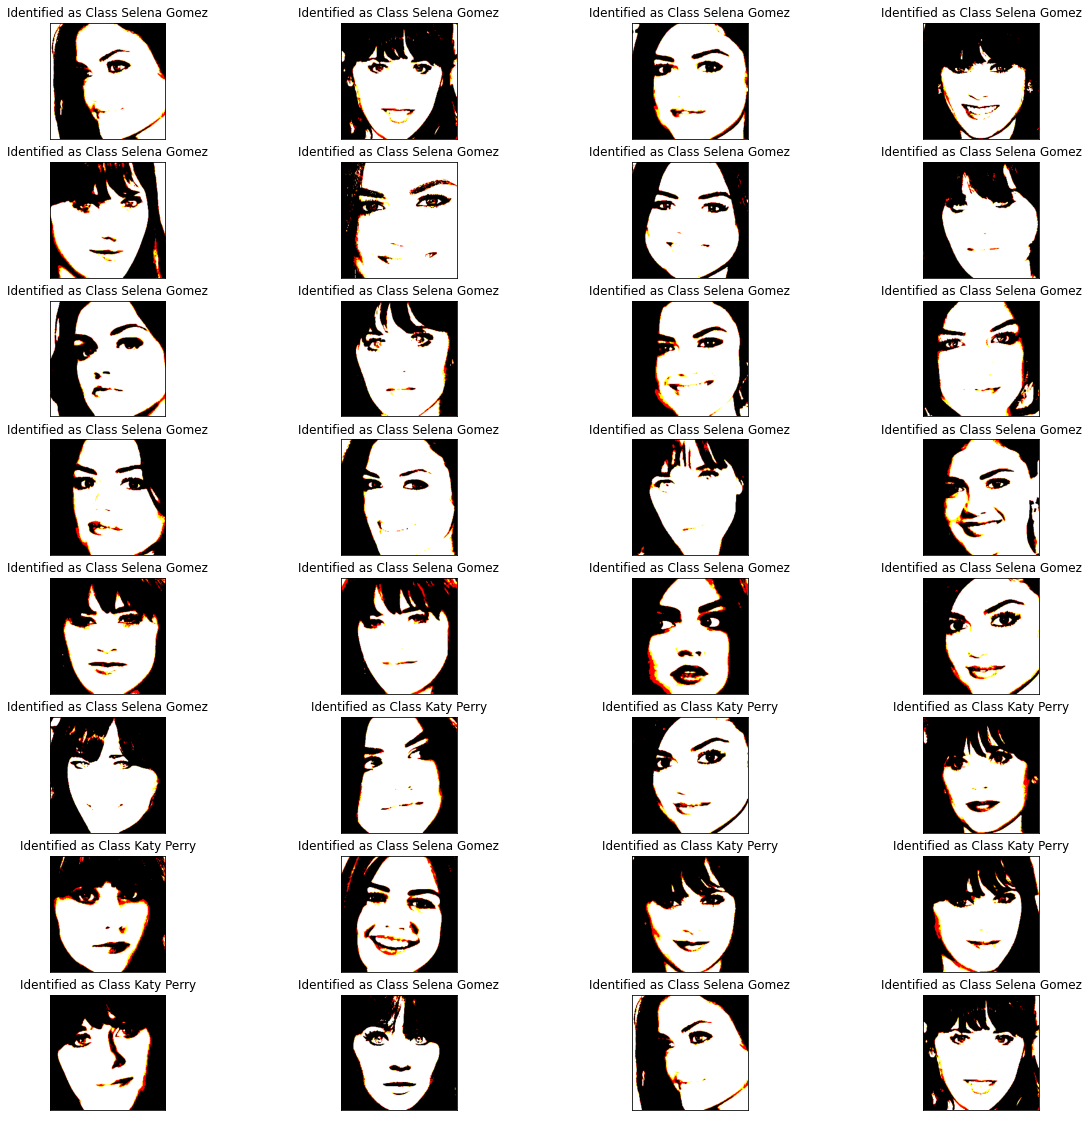

In [ ]:
y_prediction_5_lookalike = knn_model_5.predict(X_test_lookalike)
print('\n')
print('Accuracy with K=5:', accuracy_score(y_test_lookalike, y_prediction_5_lookalike))
print('\n')
#print(classification_report(y_test,y_prediction))
{0:'Katy perry',1:'Selena Gomez'}

fig, axes = plt.subplots(8, 4, figsize=(20,20),subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
  if(y_prediction_5[i]==1):
    out = "Katy Perry"
  else:
    out= "Selena Gomez"
  
  ax.title.set_text("Identified as Class {}".format(out))
  ax.imshow(x_test_lookalike[i],cmap='gray')

We also observe that changing the lighting conditions also breaks the classifier and obtained accuracy is far less

## 5.3.3 PCA

Let's try to break the PCA classifier. First, we can try with some pictures with glasses.

In [ ]:
matrix_glasses = []
data_glasses = []

# load data
img_dir = "CV_ASS/Glass_processed" 
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
for f1 in files:

    # read file
    img = cv2.imread(f1)

    # turn image to B&W
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    [h,w] = img.shape

    # add to A class
    data_glasses.append(img)

    # linearise the image
    row = np.reshape(img, (1, h*w))
    matrix_glasses.append(row.flatten())

In [ ]:
matrix_glasses_pca = pca.transform(matrix_glasses)
preds = rf.predict(matrix_glasses_pca)

real = [0,0,0,1,1,1]
acc = (preds == real).sum().item() / 6
print('Test accuracy: %f' % (acc))


Test accuracy: 0.833333


As we can see, only one image was missclassified, so the classifier was not that broken. However, as we discussed in section 4.2.1, PCA seems to focus on the fact that Katy has a fringe in most of its pictures. We grabbed 4 pictures of Selena Gomez with fringe, and classified them.

In [ ]:
matrix_fringe = []
data_fringe = []

# load data
img_dir = "CV_ASS/Selena_fringe" 
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
for f1 in files:

    # read file
    img = cv2.imread(f1)

    # turn image to B&W
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    [h,w] = img.shape

    # add to A class
    data_fringe.append(img)

    # linearise the image
    row = np.reshape(img, (1, h*w))
    matrix_fringe.append(row.flatten())

In [ ]:
matrix_fringe_pca = pca.transform(matrix_fringe)
preds = rf.predict(matrix_fringe_pca)

real = [1,1,1,1]
acc = (preds == real).sum().item() / 4
print('Test accuracy: %f' % (acc))

Test accuracy: 0.250000


Only 1 out of four images were classified correctly now, so PCA was focusing too much on the fringe. This means it is not that robust classifier, at least with this biased dataset. 

##  5.3.4 Transfer Learning



Lets test the classifier for People wearing specs

In [ ]:
for paths,dirs,files in os.walk('/content/CV_ASS/Glass_processed/'):
      for filesname in files:
          #test_image = cv2.imread("/content/CV_ASS/Dataset_processed/PROC_B"+filesname)
          img=load_img('/content/CV_ASS/Glass_processed/'+filesname,target_size=(224,224))
          plt.show(img)
          crop_img=img_to_array(img)
          crop_img=np.expand_dims(crop_img,axis=0)
          crop_img=preprocess_input(crop_img)
          img_encode=vgg_face(crop_img)
          embed=K.eval(img_encode)
           
          
          # Make Predictions
          if(filesname.split("_")[0]=="Katy"):
            per = "Katy Perry"
          else:
            per= "Selena gomez"
          person=classifier_model.predict(embed)
          #print(filesname)
          #print(person)
          #plt.imshow(img)
          name=person_rep[np.argmax(person)]
          print("\nPredicted: ", name, ". Real person: ", per)


Predicted:  A . Real person:  Katy Perry

Predicted:  B . Real person:  Selena gomez

Predicted:  B . Real person:  Selena gomez

Predicted:  B . Real person:  Selena gomez

Predicted:  A . Real person:  Katy Perry

Predicted:  A . Real person:  Katy Perry


We observe that accuracy  drop  when we add glasses
We can improve the accuracy by adding images with glasses in dataset

# **Discussion**

##  Histogram of Oriented Gradients (HOG features) - Pros, cons, possible improvements

The cons of using HOG for feature selection are:


*   Same aspect ratio of every image is needed
*   The faces should be extracted first
*   It does not work fine when images are rotated, as the histograms are included in a vector in a specific order depending on their position in the image

However, this approach has several positive aspects:

*   It works fine with images of different sizes (although same aspect ratio is needed)
*   It performs well for images with different lightings. This is due to the fact that the algorithm for HOG features extraction uses block normalizations in one of its steps. This way, the values of the gradients do not depend on how bright or dark the image is, as all of them is normalized. If this normalization was not done, the SVM would perform much worse, getting less accuracy in the predictions.
*   HOG features and SVM use shows a good combination for doing predictions.
*   HOG is a really compact way to represent the features of an image, reducing drastically the number of elements per image needed to train the SVM. Consequently, time, storage and, consequently computational power and money, are saved when using this approach.

But, what are the parameters we can play with to obtain better results?

*   Bilateral filter: different parameters were used. By changing the size and sigma values, the image will have different aspect and, consequently, different HOG features. The size will have influence on how noisy the image remains after filtering. Additionally, "if sigma values are small (< 10), the filter will not have much effect. If they are large (> 150), they will have a very strong effect, making the image look “cartoonish”" (https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html?highlight=bilateralfilter).
*   HOG extraction: 
**   The number of different orientations can be changed. A balance should be found between having only a few orientations (loss of information) and having a huge number. 9 different orientations showed good performance. 
*   * The pixels per cell when obtaining the histograms is a parameter that has also be changed to obtain good results. A huge number of pixels per cell has a positive aspect: less elements are needed in the vectors representing the HOGs. However, the cost is losing information. On the other side, if only a very few pixels per cell are taken, we would obtain very fine patters in the HOGs without showing a better performance and using plenty of computational power and storage. Therefore, a balanced number of pixels per cell must be used to obtain a good performance without using a big amount of resources.
**   Another design parameter that can be changed to check different performances is the number of cells per block when using normalization (remember that normalization is needed so the results do not depend on the light the image has).

* In case the other design parameters are not enough to obtain good results, the kernel of the SVM can also be changed to more complex ones. In this project, a linear kernel achieved a really good performance.



Summarize what you have learned in this assignment. Discuss qualitative differences between
the different feature representations that you constructed on your (small) faces training set.
Why would one work better than the other? What would you do better/more if you would
have plenty of time to spend on this step? Discuss the results on the test images for the two
5
tasks. Imagine that there is a company that wants to purchase your face detection prototype
system to install in their offices as a means of authenticating employees. Would it be easy to
fool this system? What would you advise the company? What are the current limitations
of your prototype and what would you do next to make your system better?

**SIFT Discussion part**

Scale invariant feature transform is a technique to detect and find keypoints. Out of the first tests it was found that the algothm find plenty of features in an image. Hence, the algortihm needs to be tweaked to detect all the good features and not the small detailted features. These feature could lead to a lot of mismatches in the feature matching. Spending more time on tweaking the algortihm would probably leading in better results. Filtering out the clutter features which do not represent face characteristics would lead to a improvement of matching.

Nevertheless, SIFT features can be very practical for training a classifier as is seen in furter stages of the assigment. With sufficient training data good classifiers can be made. 

**PCA discussion part**

PCA is based in a pure mathematical feature reduction. It finds the directions of maximum variation in the image dimension (pixel [height x width] dimensional space), and project this high dimensional space to a smaller dimension. This does not take advantage of the local properties of images, since treats equally pixels placed close or far. However, it has shown promising results in face recognition. 

In this case, we did not have a very extensive dataset, so using a technique like PCA was not bounf to get a great success. It did not. However, it is still useful, since it can be used to reduce the dimensions of the input space, and then be used to feed other Machine Learning algorithms, like Random Forest. Although we got great results at first, this method is not that robust, since it can be easily broken if we train with a scarce dataset. What is more, this method can not be exploited that much, so if we had plenty of timem I would not spend it trying to optimise it.

**Transfer Learning**
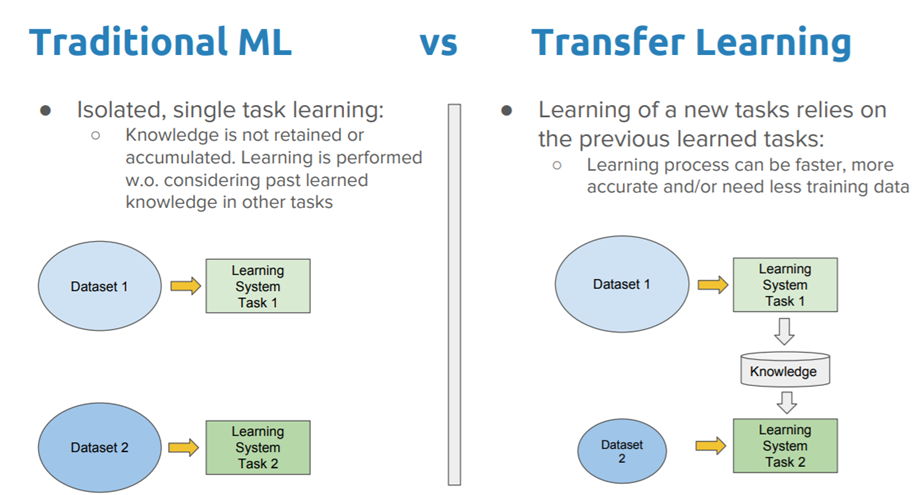

Transfer learning, is having the ability to utilize existing knowledge from the source learner in the target task. During the process of transfer learning, the following three important questions must be answered:

**What to transfer**: This is the first and the most important step in the whole process. We try to seek answers about which part of the knowledge can be transferred from the source to the target in order to improve the performance of the target task. When trying to answer this question, we try to identify which portion of knowledge is source-specific and what is common between the source and the target.

**When to transfer**: There can be scenarios where transferring knowledge for the sake of it may make matters worse than improving anything (also known as negative transfer). We should aim at utilizing transfer learning to improve target task performance/results and not degrade them. We need to be careful about when to transfer and when not to.

**How to transfer**: Once the what and when have been answered, we can proceed towards identifying ways of actually transferring the knowledge across domains/tasks. This involves changes to existing algorithms and different techniques, which we will cover in later sections of this article. Also, specific case studies are lined up in the end for a better understanding of how to transfer.

**Advantages of Transfer Learning**


**Improved baseline performance**: When we augment the knowledge of an isolated learner (also known as an ignorant learner) with knowledge from a source model, the baseline performance might improve due to this knowledge transfer.

**Model-development time**: Utilizing knowledge from a source model might also help in fully learning the target task, as compared to a target model that learns from scratch. This, in turn, results in improvements in the overall time taken to develop/learn a model.

**Disadvantages of Transfer Learning**

Currently, one of the biggest limitations to transfer learning is the problem of negative transfer. Transfer learning only works if the initial and target problems are similar enough for the first round of training to be relevant. Developers can draw reasonable conclusions about what type of training counts as “similar enough” to the target, but the algorithm doesn’t have to agree. If the first round of training is too far off the mark, the model may actually perform worse than if it had never been trained at all. Right now, there are still no clear standards on what types of training are sufficiently related, or how this should be measured

whenever you use transfer learning, your training data should have two options. First of all, the distribution of the training data which your pre-trained model has used should be like the data that you are going to face during test time or at least don't vary too much. Second, the number of training data for transfer learning should be in a way that you don't overfit the model



We can find some **qualitative differences** between the different features we extracted. PCA is an unsupervised algorithm, which only attends to the distribution of the datapoints in the space in order to reduce dimensionality. HOG and SIFT are used to extract features from the images, so it can't be used for classification neither. This means that PCA, SIFT and HOG can't be used by themselves to classify images. That is why we used Random Forest and SVM on the features they extracted. On the other hand, transfer learning is a supervised learning algorithm which uses the class labels in order to classify the images, building appropiate intermediate representations for the classification task. To do that, we load a pretrained model and training it to be used in our specific task.

**Some algorithm worked better than others**. First, for the handcrafted features, we implemented SIFT and HOG. While HOG worked fine from the beginning, we found SIFT quite more challenging. It was difficult to make it robust. Main features were recognised for all the people equally, and we were not able to use them to classify the images. That is why we decided to use HOG as handcrafted features generator for the rest of the assignment. We used SVM on top of it and we had perfect results. HOG is specific for images, so it was expected to work pretty well. On the other hand, PCA is a very wide technique which can be used in a lot of scenarios. Also, it does not take into account the locality of the image: two proximity of the pixels in the image are not taken into account in PCA, since all the pixels are treated equally. That is one reason why, although PCA can be succesfully used for face recognition, it is not the best algorithm we used here. Finally, transfer learning was very succesfull also. The fact that we can use a pretrained model (with thousands of images) is a great advantage. Then, we only have to fine-tune it for our specific task. It shows great results although the dataset was very scarce (40 images). The fact that it worked even with this restriction shows the potential of this method and why it is a state of art method.

If we had more time, we first would try to focus on SIFT, since we did could not get it maximum potential. Apart from that, it would be a good idea to train the neural network from scratch. Building a bigger dataset would also increase accuracy of the classifier. We could also look to the results for different genders,age and race and see how the classifier reacts to that. It should not get overfitted based on skin color and facial accesories(googles, piercings) . We could also inspect more classifier and compare their preformance,.


The result on the test images for the different classifiers was as follows. The HOG features classified with 100% with a SVM classifier used. Using KNN an accuracy was reached of 90% with K=3 and 70% with k=5. As can be seen is that SVM is the best classifier in this case. Using the PCA features and random classifier a good accuracy of 100% was reached. The KNN classifier did not really work since PCA does not use classes to reduce the dimensionality. At last Transfer learning gave general perfect results for all the values of K in the KNN classifier. Nevertheless, K=1 has always worked the best. 

If we would commercialize our prototype the best thing would be to use a deeplearning method in our case the Transfer Learning one would be more reliable. It needs more recourses(memory, RAM, dataset, CPU, GPU and training time) and it might also require additional step of model optimasation to use on mobile or on chip. So the mobile company as Oneplus and Apple are using deeplearning techniques for facial phone unlocking. Because deeplearning outpreforms the other machine learning techniques. Since the application is for security/authentication we can not affort to have any false postives and accuracy can not be compromised at any cost. That is why transferlearning for facerecognition would be the best choice to sell to the company.

The other techniques with HOG and PCA will be easier to brake/fool. As can be seen in 5.3 rotation will break the HOG features classification. For PCA main face charasteristics as different hairstyles and glasses could fool the classifier. That why we again adivse the company to use Transfer learning. And to increase accuracy use a huge dataset to make the model robust. With a huge dataset it is really unlikely to fool the model but there is still a possibility because no model gives 100% over all the unseen data. 




#  References

https://pythonmachinelearning.pro/face-recognition-with-eigenfaces/

https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/.

https://www.researchgate.net/post/Feature_extraction_from_a_face_image_using_cnn

https://towardsdatascience.com/a-comprehensive-hands-on-guide-to-transfer-learning-with-real-world-applications-in-deep-learning-212bf3b2f27a

https://www.learnopencv.com/histogram-of-oriented-gradients/

https://www.learnopencv.com/svm-using-scikit-learn-in-python/

https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html?highlight=bilateralfilter

https://towardsdatascience.com/an-introduction-to-t-sne-with-python-example-5a3a293108d1

https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761